


<p style="font-size:36px;text-align:center"> <b>A Case Study on Personalized Cancer Diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>

<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

To classify the genes into one of the 9 classes for a given set of features. It is a multi class classification problem.

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.linear_model import SGDClassifier
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [210]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [211]:
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Preprocessing of text</h3>

In [212]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [213]:
stop_words = set(stopwords.words('english'))        # loading stop words from nltk library

def nlp_preprocessing(text, index, column):
    if type(text) is not int:
        string = ""
        text = re.sub('[^a-zA-Z0-9\n]', ' ', text)  # replace every special char with space
        text = re.sub('\s+',' ', text)              # replace multiple spaces with single space
        text = text.lower()                         # converting all the chars into lower-case.
        
        for word in text.split():
            if not word in stop_words:              # if the word is a not a stop word then retain that word from the data
                string += word + " "
        
        data_text[column][index] = string

In [214]:
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.process_time(), "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 898.546875 seconds


In [215]:
result = pd.merge(data, data_text,on='ID', how='left')   #merging both gene_variations and text data based on ID
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [216]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [217]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [218]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [219]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [220]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

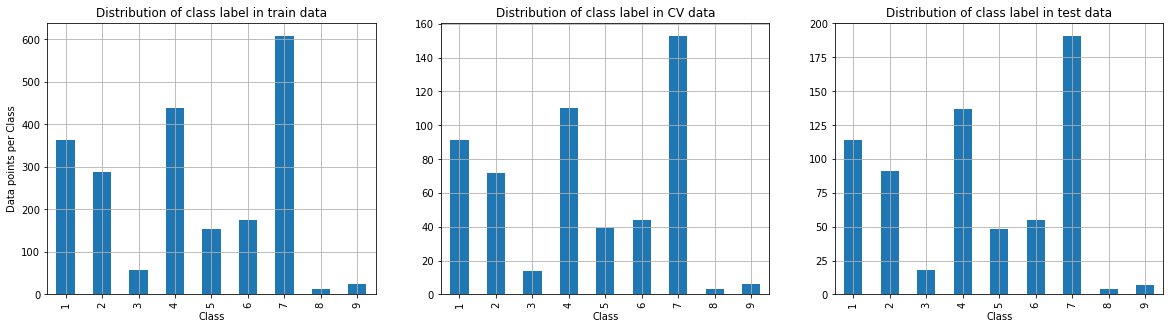

In [222]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of class label in train data')
plt.grid()
plt.subplot(1,3,2)
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.title('Distribution of class label in CV data')
plt.grid()
plt.subplot(1,3,3)
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.title('Distribution of class label in test data')
plt.grid()

plt.show()


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [223]:
def plot_confusion_matrix(test_y, predict_y):          # This function plots the confusion matrices given y_i, y_i_hat.
    C = confusion_matrix(test_y, predict_y)
    
    Recall =(((C.T)/(C.sum(axis=1))).T)     #divide each element of the confusion matrix with the sum of elements in that column
    
    Precision =(C/C.sum(axis=0))            #divide each element of the confusion matrix with the sum of elements in that row

    labels = [1,2,3,4,5,6,7,8,9]
    
    print("-"*20, "Confusion matrix", "-"*20)  # representing in heatmap format
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(Precision, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)  
    plt.figure(figsize=(20,7))
    sns.heatmap(Recall, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [224]:
# we need to generate 9 numbers and the sum of numbers should be 1
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Cross Validation Log loss: ",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    probs = np.random.rand(1,9)
    test_predicted_y[i] = probs/sum(probs[0])
print("Test Log loss: ",log_loss(y_test,test_predicted_y, eps=1e-15))

Cross Validation Log loss:  2.5018130940688446
Test Log loss:  2.492651716020847


<h2>3.3 Univariate Analysis</h2>

In [225]:
# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):

    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):

    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [226]:
genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', genes.shape[0])
print(genes.head(5))

Number of Unique Genes : 236
BRCA1    158
TP53     108
EGFR     102
PTEN      83
BRCA2     82
Name: Gene, dtype: int64


In [227]:
print("Ans: There are", genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 236 different categories of genes in the train data, and they are distibuted as follows


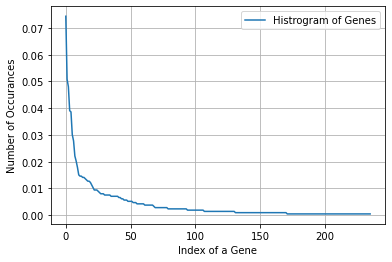

In [229]:
s = sum(genes.values);
h = genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

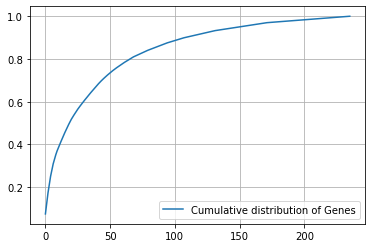

In [230]:
sum = sum(genes.values);
val = genes.values/sum;
cdf = np.cumsum(val)
plt.plot(cdf,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [231]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))    # train gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))      # test gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))          # cross validation gene feature

In [232]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [233]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [235]:
train_df['Gene'].head()

1396     FGFR3
2680     BRCA1
687     CDKN2A
900     PDGFRA
2232      PTEN
Name: Gene, dtype: object

In [236]:
gene_vectorizer.get_feature_names()

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1b',
 'arid2',
 'arid5b',
 'atm',
 'atr',
 'atrx',
 'aurka',
 'axin1',
 'b2m',
 'bap1',
 'bard1',
 'bcl10',
 'bcl2l11',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd2',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdk6',
 'cdk8',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'cdkn2c',
 'cebpa',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctla4',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'egfr',
 'elf3',
 'ep300',
 'epas1',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fam58a',
 'fanca',
 'fancc',
 'fat1',
 'fbxw7',
 'fgf3',
 'fgf4',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt1',
 'flt3',
 'foxa1',
 'foxl2',
 'foxo1',
 'foxp1',
 'fubp1',
 'gata3',
 'gli1',
 'gna11',
 'gnaq',
 'gnas',
 'h3f3a',
 'hist1h1c',
 'hla',
 'hnf1a',
 'hras',
 'idh1',
 'idh2',

In [237]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 236)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.2486154612483726
For values of alpha =  0.0001 The log loss is: 1.2215851171252727
For values of alpha =  0.001 The log loss is: 1.2401705658921125
For values of alpha =  0.01 The log loss is: 1.333405363696691
For values of alpha =  0.1 The log loss is: 1.4239364327131208
For values of alpha =  1 The log loss is: 1.4592797891128266


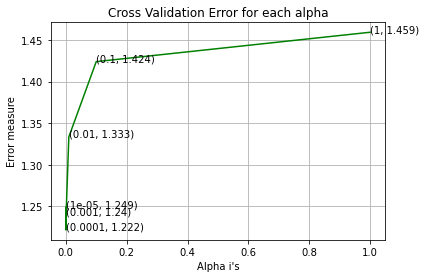

For values of best alpha =  0.0001 The train log loss is: 0.9801114947141302
For values of best alpha =  0.0001 The cross validation log loss is: 1.2215851171252727
For values of best alpha =  0.0001 The test log loss is: 1.1982336553473687


In [238]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [239]:
print("No. of data points in train dataset: ", genes.shape[0])

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('\nTrain and CV data coverage: \n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

No. of data points in train dataset:  236

Train and CV data coverage: 
1. In test data 647 out of 665 : 97.29323308270676
2. In cross validation data 517 out of  532 : 97.18045112781954


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [240]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1926
Truncating_Mutations    63
Deletion                48
Amplification           45
Fusions                 23
G12V                     3
Overexpression           3
Q209L                    2
A146T                    2
R841K                    2
I31M                     2
Name: Variation, dtype: int64


In [241]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1926 different categories of variations in the train data, and they are distibuted as follows


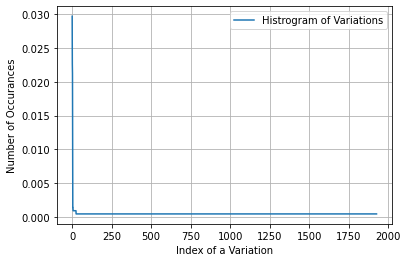

In [242]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02966102 0.05225989 0.07344633 ... 0.99905838 0.99952919 1.        ]


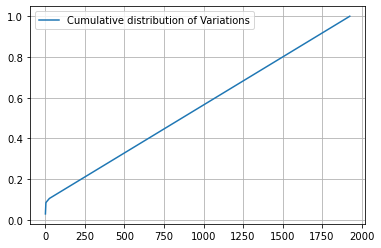

In [243]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [244]:
# alpha is used for laplace smoothing
alpha = 1
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df)) # train gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))   # test gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))       # cross validation gene feature

In [245]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [246]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [247]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1956)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.7387093075381774
For values of alpha =  0.0001 The log loss is: 1.7312547996141732
For values of alpha =  0.001 The log loss is: 1.7313537989740704
For values of alpha =  0.01 The log loss is: 1.742163219801753
For values of alpha =  0.1 The log loss is: 1.7472375307329595
For values of alpha =  1 The log loss is: 1.7480427697966203


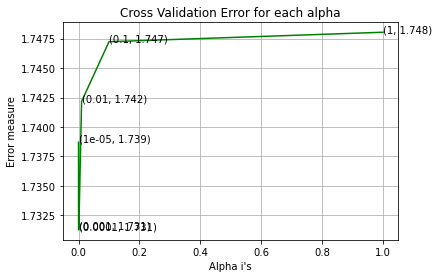

For values of best alpha =  0.0001 The train log loss is: 0.6772368199099263
For values of best alpha =  0.0001 The cross validation log loss is: 1.7312547996141732
For values of best alpha =  0.0001 The test log loss is: 1.7081717719404126


In [248]:
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [249]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1926  genes in test and cross validation data sets?
Ans
1. In test data 75 out of 665 : 11.278195488721805
2. In cross validation data 48 out of  532 : 9.022556390977442


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [250]:

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [251]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [252]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 53012


In [253]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [254]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [255]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [256]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [257]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [258]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({3: 5402, 4: 3513, 5: 3193, 6: 2544, 7: 2149, 8: 1981, 10: 1629, 9: 1500, 12: 1223, 13: 1123, 11: 1091, 14: 898, 16: 862, 15: 762, 18: 754, 20: 694, 19: 546, 17: 533, 21: 506, 24: 470, 25: 460, 26: 400, 27: 374, 23: 366, 30: 363, 22: 359, 28: 349, 29: 326, 49: 319, 46: 304, 32: 302, 31: 281, 36: 280, 35: 257, 40: 238, 33: 230, 39: 225, 37: 207, 38: 204, 34: 202, 42: 199, 43: 190, 50: 188, 48: 182, 45: 159, 56: 156, 41: 156, 54: 155, 44: 153, 52: 151, 51: 147, 57: 146, 62: 138, 60: 137, 47: 132, 63: 129, 55: 128, 58: 119, 68: 117, 53: 117, 70: 111, 92: 107, 65: 104, 64: 104, 59: 104, 67: 100, 80: 99, 72: 99, 69: 96, 78: 93, 61: 91, 66: 89, 71: 84, 84: 83, 74: 81, 81: 80, 77: 78, 75: 77, 90: 76, 76: 76, 73: 76, 88: 71, 91: 70, 97: 66, 94: 65, 93: 64, 82: 64, 83: 63, 120: 61, 96: 61, 89: 60, 87: 60, 79: 60, 86: 58, 132: 57, 116: 55, 99: 55, 95: 55, 85: 55, 103: 54, 98: 54, 100: 53, 138: 52, 101: 52, 112: 51, 111: 51, 125: 48, 115: 48, 124: 46, 108: 46, 140: 45, 126: 45, 110: 45, 1

For values of alpha =  1e-05 The log loss is: 1.3449116243800863
For values of alpha =  0.0001 The log loss is: 1.2296293876934727
For values of alpha =  0.001 The log loss is: 1.2458867161474216
For values of alpha =  0.01 The log loss is: 1.3366884262793088
For values of alpha =  0.1 The log loss is: 1.519083946757961
For values of alpha =  1 The log loss is: 1.6945255435937976


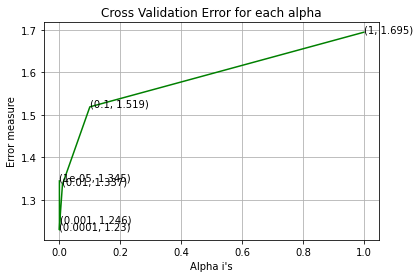

For values of best alpha =  0.0001 The train log loss is: 0.6698378552075264
For values of best alpha =  0.0001 The cross validation log loss is: 1.2296293876934727
For values of best alpha =  0.0001 The test log loss is: 1.126332271177708


In [259]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [260]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [261]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

96.577 % of word of test data appeared in train data
97.834 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [262]:
#Data preparation for ML models.

def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [264]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [265]:
# merging gene, variance and text features
# building train, test and cross validation data sets

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [266]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 55204)
(number of data points * number of features) in test data =  (665, 55204)
(number of data points * number of features) in cross validation data = (532, 55204)


In [267]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.324738327652938
for alpha = 0.0001
Log Loss : 1.3290052382136075
for alpha = 0.001
Log Loss : 1.3317686801074555
for alpha = 0.1
Log Loss : 1.329313569397497
for alpha = 1
Log Loss : 1.3176456257548048
for alpha = 10
Log Loss : 1.38109034825893
for alpha = 100
Log Loss : 1.3897700170185767
for alpha = 1000
Log Loss : 1.3748944129678782


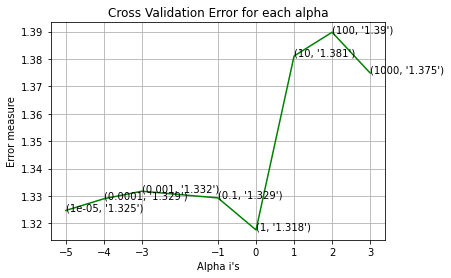

For values of best alpha =  1 The train log loss is: 0.8999644081050184
For values of best alpha =  1 The cross validation log loss is: 1.3176456257548048
For values of best alpha =  1 The test log loss is: 1.285314883736926


In [268]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.3176456257548048
Number of missclassified point : 0.40225563909774437
-------------------- Confusion matrix --------------------


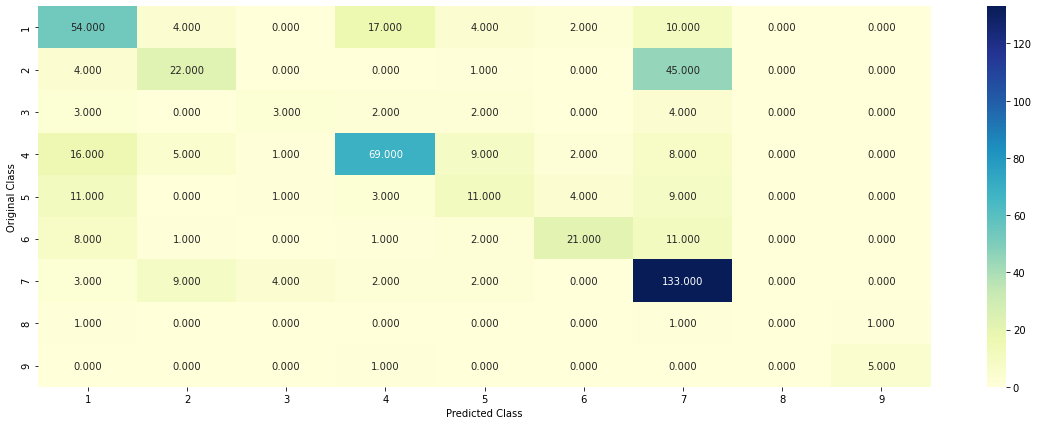

-------------------- Precision matrix (Columm Sum=1) --------------------


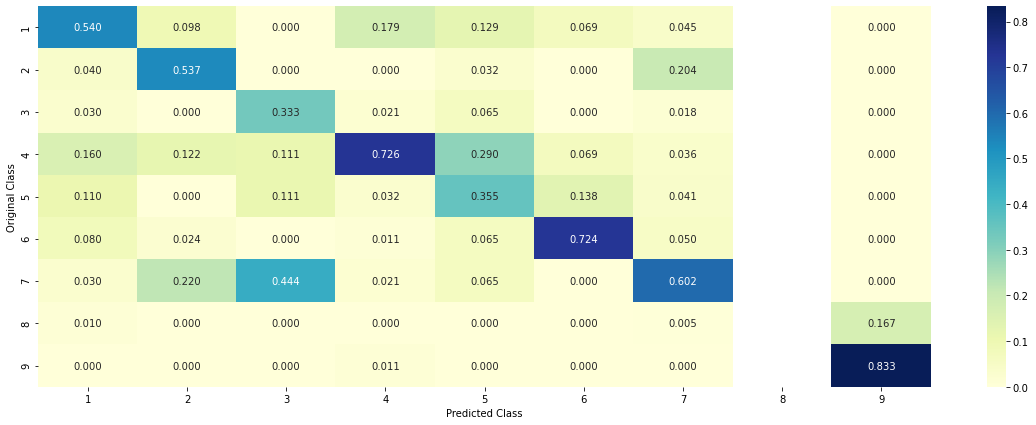

-------------------- Recall matrix (Row sum=1) --------------------


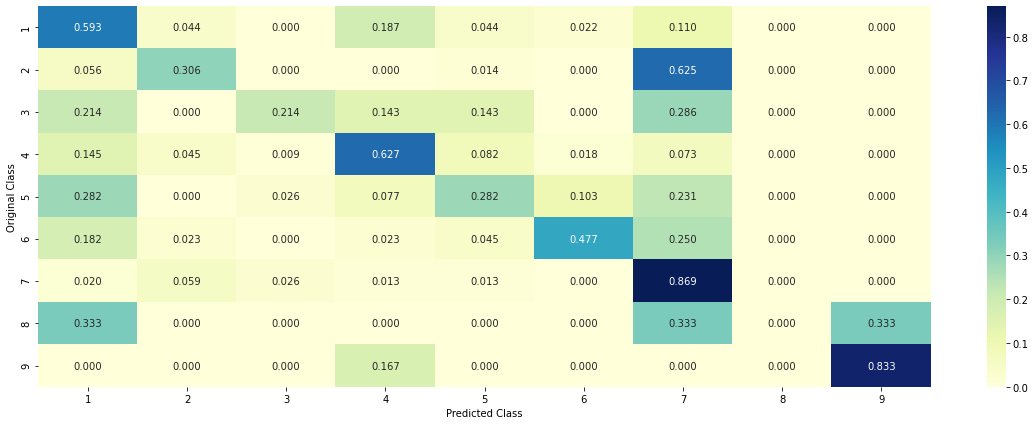

In [269]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [270]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])

indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1927 0.1225 0.0271 0.2498 0.2477 0.0509 0.094  0.0087 0.0064]]
Actual Class : 5
--------------------------------------------------
Out of the top  100  features  0 are present in query point


In [271]:
test_df['TEXT'].iloc[test_point_index]

'abstract germline inactivating mutations brca1 brca2 genes responsible hereditary breast ovarian cancer syndrome hbocs genetic testing genes available although approximately 15 tests identify variants uncertain significance vus classification variants pathogenic non pathogenic type important challenge genetic diagnosis counseling aim present study functionally assess set 7 missense vus q1409l s1473p e1586g r1589h y1703s w1718l g1770v located c terminal region brca1 combining silico prediction tools structural analysis transcription activation ta assay silico prediction programs gave discrepant results making interpretation difficult structural analysis three variants located brct domains y1703s w1718l g1770v reveals significant alterations brct structure ta assay shows variants y1703s w1718l g1770v dramatically compromise transcriptional activity brca1 variants q1409l s1473p e1586g r1589h behave like wild type brca1 conclusion results suggest variants y1703s w1718l g1770v classified l

In [272]:
no_feature

100

In [273]:
test_df['Gene'].iloc[test_point_index]

'BRCA1'

In [274]:
test_df['Variation'].iloc[test_point_index]

'R1589H'

In [275]:
clf.coef_.shape

(9, 55204)

In [276]:
indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
indices[0]

array([    0, 28739, 28738, 28736, 28732, 28731, 28729, 28728, 28718,
       28706, 28704, 28699, 28698, 28695, 28693, 28692, 28691, 28686,
       28683, 28682, 28679, 28677, 28676, 28662, 28661, 28659, 28746,
       28747, 28750, 28754, 28823, 28822, 28821, 28820, 28819, 28817,
       28812, 28810, 28809, 28806, 28804, 28800, 28657, 28799, 28791,
       28786, 28781, 28780, 28779, 28776, 28775, 28774, 28772, 28763,
       28762, 28757, 28794, 28656, 28655, 28644, 28511, 28510, 28492,
       28490, 28489, 28485, 28484, 28471, 28470, 28469, 28468, 28467,
       28514, 28466, 28462, 28461, 28452, 28444, 28439, 28436, 28429,
       28427, 28424, 28400, 28398, 28392, 28465, 28832, 28522, 28536,
       28643, 28637, 28623, 28614, 28613, 28612, 28610, 28607, 28605,
       28601], dtype=int64)

In [278]:
for i in range(10):
  test_point_index = i
  no_feature = 100
  predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
  print("Predicted Class :", predicted_cls[0])
  print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
  print("Actual Class :", test_y[test_point_index])
  indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:]
  print("-"*50)
  get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.2494 0.0911 0.0203 0.4673 0.0519 0.0382 0.0702 0.0065 0.005 ]]
Actual Class : 4
--------------------------------------------------
23734 Text feature [n235k] present in test data point [True]
23771 Text feature [gleevec] present in test data point [True]
24736 Text feature [daily] present in test data point [True]
25089 Text feature [286] present in test data point [True]
25346 Text feature [atr] present in test data point [True]
26302 Text feature [sarcoma] present in test data point [True]
26419 Text feature [pgl3] present in test data point [True]
27090 Text feature [272] present in test data point [True]
27113 Text feature [web] present in test data point [True]
27388 Text feature [sti] present in test data point [True]
27402 Text feature [insertions] present in test data point [True]
27578 Text feature [enthalpy] present in test data point [True]
27629 Text feature [r1] present in test data point [True]
28283 Text feature [hea

39865 Text feature [cervical] present in test data point [True]
39872 Text feature [drug] present in test data point [True]
39897 Text feature [r282] present in test data point [True]
39936 Text feature [solved] present in test data point [True]
39941 Text feature [deleting] present in test data point [True]
39992 Text feature [competitive] present in test data point [True]
40036 Text feature [cancerous] present in test data point [True]
40040 Text feature [angiogenic] present in test data point [True]
40041 Text feature [computer] present in test data point [True]
40063 Text feature [ckii] present in test data point [True]
40073 Text feature [polycyclic] present in test data point [True]
40078 Text feature [macromolecule] present in test data point [True]
40144 Text feature [intricate] present in test data point [True]
40152 Text feature [administration] present in test data point [True]
40177 Text feature [dashed] present in test data point [True]
40180 Text feature [disordered] pres

42900 Text feature [cription] present in test data point [True]
42901 Text feature [leukaemia47] present in test data point [True]
42902 Text feature [site50] present in test data point [True]
42903 Text feature [astonishingly] present in test data point [True]
42907 Text feature [3sigma] present in test data point [True]
42910 Text feature [selection31] present in test data point [True]
42911 Text feature [reversed32] present in test data point [True]
42912 Text feature [tetramer43] present in test data point [True]
42913 Text feature [effect45] present in test data point [True]
42914 Text feature [structure42] present in test data point [True]
42915 Text feature [affinity42] present in test data point [True]
42916 Text feature [comp53] present in test data point [True]
42917 Text feature [nmr32] present in test data point [True]
42920 Text feature [degradation10] present in test data point [True]
42921 Text feature [mouse35] present in test data point [True]
42922 Text feature [const

44824 Text feature [beta] present in test data point [True]
44828 Text feature [cassettes] present in test data point [True]
44832 Text feature [atom] present in test data point [True]
44852 Text feature [p53aip] present in test data point [True]
44861 Text feature [feedback] present in test data point [True]
44866 Text feature [conventional] present in test data point [True]
44867 Text feature [proliferate] present in test data point [True]
44874 Text feature [expose] present in test data point [True]
44894 Text feature [traditional] present in test data point [True]
44902 Text feature [distortion] present in test data point [True]
44903 Text feature [249] present in test data point [True]
44926 Text feature [approx] present in test data point [True]
44940 Text feature [clefts] present in test data point [True]
44943 Text feature [binding28] present in test data point [True]
44965 Text feature [scientists] present in test data point [True]
44993 Text feature [tetramerization] present 

48223 Text feature [pflmi] present in test data point [True]
48235 Text feature [people] present in test data point [True]
48238 Text feature [clashes] present in test data point [True]
48239 Text feature [strictly] present in test data point [True]
48254 Text feature [html] present in test data point [True]
48258 Text feature [apai] present in test data point [True]
48277 Text feature [deletions] present in test data point [True]
48287 Text feature [quaternary] present in test data point [True]
48299 Text feature [l1] present in test data point [True]
48301 Text feature [v173l] present in test data point [True]
48312 Text feature [iv] present in test data point [True]
48313 Text feature [prognosis] present in test data point [True]
48331 Text feature [reversed] present in test data point [True]
48333 Text feature [encouraged] present in test data point [True]
48349 Text feature [ion] present in test data point [True]
48353 Text feature [gain] present in test data point [True]
48360 Te

50506 Text feature [t284r] present in test data point [True]
50514 Text feature [inhibitor] present in test data point [True]
50515 Text feature [successful] present in test data point [True]
50516 Text feature [kinase] present in test data point [True]
50528 Text feature [repeats] present in test data point [True]
50529 Text feature [ura] present in test data point [True]
50573 Text feature [yield] present in test data point [True]
50576 Text feature [rby41] present in test data point [True]
50585 Text feature [treatments] present in test data point [True]
50589 Text feature [mode] present in test data point [True]
50593 Text feature [apoptotic] present in test data point [True]
50612 Text feature [white] present in test data point [True]
50614 Text feature [increasingly] present in test data point [True]
50616 Text feature [promoters] present in test data point [True]
50627 Text feature [recombination] present in test data point [True]
50634 Text feature [bax] present in test data po

51410 Text feature [buried] present in test data point [True]
51428 Text feature [needed] present in test data point [True]
51449 Text feature [studying] present in test data point [True]
51478 Text feature [head] present in test data point [True]
51479 Text feature [overall] present in test data point [True]
51484 Text feature [basic] present in test data point [True]
51486 Text feature [suppressed] present in test data point [True]
51494 Text feature [temperatures] present in test data point [True]
51498 Text feature [pathway] present in test data point [True]
51506 Text feature [took] present in test data point [True]
51509 Text feature [messengers] present in test data point [True]
51511 Text feature [towards] present in test data point [True]
51529 Text feature [complexes] present in test data point [True]
51532 Text feature [rich] present in test data point [True]
51543 Text feature [000] present in test data point [True]
51552 Text feature [kinases] present in test data point [T

52096 Text feature [adjacent] present in test data point [True]
52097 Text feature [stronger] present in test data point [True]
52100 Text feature [morphology] present in test data point [True]
52101 Text feature [introduce] present in test data point [True]
52102 Text feature [denaturation] present in test data point [True]
52105 Text feature [exact] present in test data point [True]
52107 Text feature [please] present in test data point [True]
52114 Text feature [factors] present in test data point [True]
52126 Text feature [66] present in test data point [True]
52127 Text feature [away] present in test data point [True]
52133 Text feature [transformed] present in test data point [True]
52138 Text feature [predominantly] present in test data point [True]
52139 Text feature [chain] present in test data point [True]
52143 Text feature [network] present in test data point [True]
52147 Text feature [compensate] present in test data point [True]
52148 Text feature [humans] present in test

52766 Text feature [stable] present in test data point [True]
52769 Text feature [4c] present in test data point [True]
52771 Text feature [destabilizing] present in test data point [True]
52776 Text feature [degree] present in test data point [True]
52779 Text feature [became] present in test data point [True]
52782 Text feature [luciferase] present in test data point [True]
52789 Text feature [judged] present in test data point [True]
52791 Text feature [particularly] present in test data point [True]
52792 Text feature [destabilize] present in test data point [True]
52794 Text feature [order] present in test data point [True]
52797 Text feature [colony] present in test data point [True]
52803 Text feature [predisposes] present in test data point [True]
52825 Text feature [currently] present in test data point [True]
52829 Text feature [transcription] present in test data point [True]
52840 Text feature [intact] present in test data point [True]
52841 Text feature [13] present in tes

53555 Text feature [range] present in test data point [True]
53556 Text feature [forming] present in test data point [True]
53560 Text feature [correlate] present in test data point [True]
53567 Text feature [account] present in test data point [True]
53571 Text feature [number] present in test data point [True]
53572 Text feature [knockout] present in test data point [True]
53574 Text feature [restored] present in test data point [True]
53579 Text feature [suppression] present in test data point [True]
53585 Text feature [carry] present in test data point [True]
53586 Text feature [chemical] present in test data point [True]
53589 Text feature [mechanisms] present in test data point [True]
53590 Text feature [basis] present in test data point [True]
53591 Text feature [boxes] present in test data point [True]
53593 Text feature [destroyed] present in test data point [True]
53599 Text feature [involves] present in test data point [True]
53600 Text feature [consists] present in test dat

54068 Text feature [allowed] present in test data point [True]
54069 Text feature [12] present in test data point [True]
54071 Text feature [obtain] present in test data point [True]
54074 Text feature [nuclear] present in test data point [True]
54077 Text feature [six] present in test data point [True]
54079 Text feature [various] present in test data point [True]
54081 Text feature [evidence] present in test data point [True]
54086 Text feature [products] present in test data point [True]
54091 Text feature [supports] present in test data point [True]
54093 Text feature [transiently] present in test data point [True]
54096 Text feature [strongly] present in test data point [True]
54097 Text feature [identification] present in test data point [True]
54098 Text feature [amounts] present in test data point [True]
54103 Text feature [wt] present in test data point [True]
54104 Text feature [substitution] present in test data point [True]
54105 Text feature [predict] present in test data 

54471 Text feature [raised] present in test data point [True]
54472 Text feature [permissive] present in test data point [True]
54475 Text feature [independent] present in test data point [True]
54477 Text feature [high] present in test data point [True]
54478 Text feature [prevent] present in test data point [True]
54479 Text feature [role] present in test data point [True]
54483 Text feature [transformants] present in test data point [True]
54486 Text feature [damaging] present in test data point [True]
54490 Text feature [28] present in test data point [True]
54491 Text feature [reduce] present in test data point [True]
54502 Text feature [suggests] present in test data point [True]
54505 Text feature [recombinant] present in test data point [True]
54506 Text feature [induced] present in test data point [True]
54507 Text feature [table] present in test data point [True]
54508 Text feature [observed] present in test data point [True]
54509 Text feature [red] present in test data poin

54736 Text feature [37] present in test data point [True]
54737 Text feature [mutant] present in test data point [True]
54740 Text feature [represent] present in test data point [True]
54743 Text feature [reveal] present in test data point [True]
54745 Text feature [unable] present in test data point [True]
54747 Text feature [inactivate] present in test data point [True]
54750 Text feature [figure] present in test data point [True]
54751 Text feature [showed] present in test data point [True]
54752 Text feature [furthermore] present in test data point [True]
54753 Text feature [domains] present in test data point [True]
54756 Text feature [compared] present in test data point [True]
54763 Text feature [site] present in test data point [True]
54767 Text feature [additional] present in test data point [True]
54769 Text feature [consistent] present in test data point [True]
54773 Text feature [sequence] present in test data point [True]
54774 Text feature [possibly] present in test data 

55108 Text feature [loss] present in test data point [True]
55109 Text feature [corresponds] present in test data point [True]
55113 Text feature [indicates] present in test data point [True]
55116 Text feature [general] present in test data point [True]
55117 Text feature [terminal] present in test data point [True]
55118 Text feature [expressed] present in test data point [True]
55119 Text feature [possible] present in test data point [True]
55122 Text feature [important] present in test data point [True]
55123 Text feature [shown] present in test data point [True]
55125 Text feature [presented] present in test data point [True]
55126 Text feature [competent] present in test data point [True]
55128 Text feature [although] present in test data point [True]
55129 Text feature [heterologous] present in test data point [True]
55130 Text feature [bind] present in test data point [True]
55131 Text feature [affect] present in test data point [True]
55132 Text feature [co] present in test da

41680 Text feature [437] present in test data point [True]
41856 Text feature [proving] present in test data point [True]
41975 Text feature [scenario] present in test data point [True]
42318 Text feature [decision] present in test data point [True]
42419 Text feature [carboxy] present in test data point [True]
42426 Text feature [intronic] present in test data point [True]
42470 Text feature [written] present in test data point [True]
42800 Text feature [1396] present in test data point [True]
42891 Text feature [forest] present in test data point [True]
42977 Text feature [outperform] present in test data point [True]
43001 Text feature [code] present in test data point [True]
43284 Text feature [bond] present in test data point [True]
43521 Text feature [blast] present in test data point [True]
43648 Text feature [subjects] present in test data point [True]
43798 Text feature [g1770v] present in test data point [True]
43869 Text feature [analogously] present in test data point [True

51244 Text feature [screening] present in test data point [True]
51261 Text feature [testing] present in test data point [True]
51284 Text feature [19] present in test data point [True]
51294 Text feature [solvent] present in test data point [True]
51318 Text feature [gov] present in test data point [True]
51376 Text feature [considerable] present in test data point [True]
51397 Text feature [get] present in test data point [True]
51430 Text feature [run] present in test data point [True]
51437 Text feature [quickchange] present in test data point [True]
51455 Text feature [phosphorylated] present in test data point [True]
51480 Text feature [alters] present in test data point [True]
51511 Text feature [towards] present in test data point [True]
51521 Text feature [models] present in test data point [True]
51543 Text feature [000] present in test data point [True]
51562 Text feature [approaches] present in test data point [True]
51589 Text feature [origin] present in test data point [T

52983 Text feature [293t] present in test data point [True]
53234 Text feature [internal] present in test data point [True]
53241 Text feature [exposed] present in test data point [True]
53251 Text feature [strand] present in test data point [True]
53257 Text feature [features] present in test data point [True]
53271 Text feature [interactions] present in test data point [True]
53278 Text feature [loop] present in test data point [True]
53281 Text feature [ring] present in test data point [True]
53307 Text feature [disease] present in test data point [True]
53309 Text feature [extensively] present in test data point [True]
53310 Text feature [genes] present in test data point [True]
53312 Text feature [peptide] present in test data point [True]
53339 Text feature [small] present in test data point [True]
53347 Text feature [discrepancy] present in test data point [True]
53353 Text feature [relevance] present in test data point [True]
53371 Text feature [noted] present in test data poin

54263 Text feature [help] present in test data point [True]
54273 Text feature [remain] present in test data point [True]
54274 Text feature [variant] present in test data point [True]
54281 Text feature [interacts] present in test data point [True]
54284 Text feature [especially] present in test data point [True]
54288 Text feature [16] present in test data point [True]
54306 Text feature [controls] present in test data point [True]
54343 Text feature [approximately] present in test data point [True]
54369 Text feature [25] present in test data point [True]
54372 Text feature [acts] present in test data point [True]
54374 Text feature [sites] present in test data point [True]
54383 Text feature [cell] present in test data point [True]
54384 Text feature [less] present in test data point [True]
54393 Text feature [specificity] present in test data point [True]
54396 Text feature [database] present in test data point [True]
54406 Text feature [version] present in test data point [True]


54817 Text feature [located] present in test data point [True]
54820 Text feature [revealed] present in test data point [True]
54821 Text feature [terms] present in test data point [True]
54822 Text feature [constructs] present in test data point [True]
54824 Text feature [fact] present in test data point [True]
54825 Text feature [well] present in test data point [True]
54839 Text feature [analysis] present in test data point [True]
54845 Text feature [based] present in test data point [True]
54853 Text feature [residue] present in test data point [True]
54855 Text feature [functionally] present in test data point [True]
54856 Text feature [analyses] present in test data point [True]
54857 Text feature [likely] present in test data point [True]
54870 Text feature [mutations] present in test data point [True]
54872 Text feature [domain] present in test data point [True]
54873 Text feature [responsible] present in test data point [True]
54879 Text feature [phenotype] present in test dat

22965 Text feature [loh] present in test data point [True]
23192 Text feature [obesity] present in test data point [True]
23270 Text feature [fao] present in test data point [True]
23292 Text feature [splicing] present in test data point [True]
23357 Text feature [reclassified] present in test data point [True]
23615 Text feature [recessive] present in test data point [True]
23620 Text feature [hypermethylated] present in test data point [True]
23672 Text feature [frameshift] present in test data point [True]
23767 Text feature [genotoxic] present in test data point [True]
23791 Text feature [pph2] present in test data point [True]
23801 Text feature [7g] present in test data point [True]
23898 Text feature [diabetes] present in test data point [True]
24098 Text feature [methylome] present in test data point [True]
24161 Text feature [damaging] present in test data point [True]
24235 Text feature [ir] present in test data point [True]
24323 Text feature [agriculture] present in test da

36720 Text feature [fdr] present in test data point [True]
36731 Text feature [grivennikov] present in test data point [True]
36778 Text feature [regeneration] present in test data point [True]
36811 Text feature [history] present in test data point [True]
36973 Text feature [silencer] present in test data point [True]
36993 Text feature [institut] present in test data point [True]
36996 Text feature [108] present in test data point [True]
37028 Text feature [turkson] present in test data point [True]
37049 Text feature [manuscript] present in test data point [True]
37111 Text feature [etv6] present in test data point [True]
37134 Text feature [gct] present in test data point [True]
37167 Text feature [gac] present in test data point [True]
37211 Text feature [rats] present in test data point [True]
37223 Text feature [1979] present in test data point [True]
37254 Text feature [s45a] present in test data point [True]
37384 Text feature [duo] present in test data point [True]
37633 Text

42169 Text feature [staerk] present in test data point [True]
42188 Text feature [delinskln] present in test data point [True]
42198 Text feature [delinse] present in test data point [True]
42204 Text feature [a418] present in test data point [True]
42209 Text feature [i35s] present in test data point [True]
42210 Text feature [v378] present in test data point [True]
42213 Text feature [kiaa1109] present in test data point [True]
42216 Text feature [kpna4] present in test data point [True]
42222 Text feature [yim] present in test data point [True]
42228 Text feature [28356] present in test data point [True]
42229 Text feature [delinsl] present in test data point [True]
42235 Text feature [21217] present in test data point [True]
42241 Text feature [glul] present in test data point [True]
42242 Text feature [f379] present in test data point [True]
42253 Text feature [n387] present in test data point [True]
42254 Text feature [gsser] present in test data point [True]
42256 Text feature [

44637 Text feature [geneamp] present in test data point [True]
44648 Text feature [sw480] present in test data point [True]
44655 Text feature [inflammation] present in test data point [True]
44666 Text feature [223] present in test data point [True]
44696 Text feature [er] present in test data point [True]
44726 Text feature [killela] present in test data point [True]
44734 Text feature [asn] present in test data point [True]
44738 Text feature [6r] present in test data point [True]
44743 Text feature [transformations] present in test data point [True]
44764 Text feature [subcellular] present in test data point [True]
44827 Text feature [ol] present in test data point [True]
44856 Text feature [supposed] present in test data point [True]
44869 Text feature [situations] present in test data point [True]
44895 Text feature [6q] present in test data point [True]
44896 Text feature [s45] present in test data point [True]
44981 Text feature [t41a] present in test data point [True]
44986 Te

47488 Text feature [synchronous] present in test data point [True]
47491 Text feature [7d] present in test data point [True]
47492 Text feature [robustness] present in test data point [True]
47514 Text feature [consensus] present in test data point [True]
47518 Text feature [white] present in test data point [True]
47522 Text feature [coordinated] present in test data point [True]
47551 Text feature [cateningene] present in test data point [True]
47565 Text feature [complications] present in test data point [True]
47571 Text feature [hiseq] present in test data point [True]
47575 Text feature [pcrs] present in test data point [True]
47580 Text feature [inactivation] present in test data point [True]
47590 Text feature [1988] present in test data point [True]
47596 Text feature [loci] present in test data point [True]
47634 Text feature [s2c] present in test data point [True]
47637 Text feature [affymetrix] present in test data point [True]
47643 Text feature [validation] present in tes

49368 Text feature [gatagcaccttcagcactctg] present in test data point [True]
49369 Text feature [t44a] present in test data point [True]
49370 Text feature [highmobility] present in test data point [True]
49371 Text feature [gatekeeping] present in test data point [True]
49372 Text feature [coun] present in test data point [True]
49373 Text feature [occasioned] present in test data point [True]
49374 Text feature [gccattacaactctccacaac] present in test data point [True]
49375 Text feature [kducation] present in test data point [True]
49376 Text feature [2075] present in test data point [True]
49377 Text feature [t67t9] present in test data point [True]
49378 Text feature [ta99intenititial] present in test data point [True]
49379 Text feature [ta42t70t30t3it65] present in test data point [True]
49380 Text feature [zw3] present in test data point [True]
49381 Text feature [amang] present in test data point [True]
49382 Text feature [mh02] present in test data point [True]
49383 Text feat

49876 Text feature [loss] present in test data point [True]
49879 Text feature [t8] present in test data point [True]
49880 Text feature [algorithm] present in test data point [True]
49887 Text feature [sw48] present in test data point [True]
49893 Text feature [pointed] present in test data point [True]
49894 Text feature [nucleus] present in test data point [True]
49907 Text feature [colorectal] present in test data point [True]
49958 Text feature [architectural] present in test data point [True]
49967 Text feature [321] present in test data point [True]
49973 Text feature [m5] present in test data point [True]
49981 Text feature [widespread] present in test data point [True]
49985 Text feature [124] present in test data point [True]
49992 Text feature [cirrhosis] present in test data point [True]
50018 Text feature [10f] present in test data point [True]
50026 Text feature [2525] present in test data point [True]
50076 Text feature [reversely] present in test data point [True]
50114

51285 Text feature [genbank] present in test data point [True]
51286 Text feature [fit] present in test data point [True]
51288 Text feature [nowadays] present in test data point [True]
51291 Text feature [eco] present in test data point [True]
51293 Text feature [corp] present in test data point [True]
51294 Text feature [143] present in test data point [True]
51297 Text feature [affected] present in test data point [True]
51304 Text feature [3g] present in test data point [True]
51306 Text feature [coverage] present in test data point [True]
51309 Text feature [ge] present in test data point [True]
51330 Text feature [graphs] present in test data point [True]
51332 Text feature [magnetic] present in test data point [True]
51336 Text feature [fibroblasts] present in test data point [True]
51340 Text feature [pbluescript] present in test data point [True]
51343 Text feature [corresponds] present in test data point [True]
51345 Text feature [xenopus] present in test data point [True]
51

52134 Text feature [97] present in test data point [True]
52138 Text feature [snp] present in test data point [True]
52142 Text feature [elements] present in test data point [True]
52143 Text feature [committee] present in test data point [True]
52148 Text feature [bromide] present in test data point [True]
52150 Text feature [2011] present in test data point [True]
52151 Text feature [firstly] present in test data point [True]
52157 Text feature [fraction] present in test data point [True]
52163 Text feature [phenotypes] present in test data point [True]
52164 Text feature [archival] present in test data point [True]
52169 Text feature [optimized] present in test data point [True]
52176 Text feature [synthase] present in test data point [True]
52180 Text feature [110] present in test data point [True]
52189 Text feature [inflammatory] present in test data point [True]
52190 Text feature [elsewhere] present in test data point [True]
52193 Text feature [aspect] present in test data poin

52741 Text feature [enhancement] present in test data point [True]
52746 Text feature [began] present in test data point [True]
52747 Text feature [pro] present in test data point [True]
52756 Text feature [driver] present in test data point [True]
52760 Text feature [107] present in test data point [True]
52764 Text feature [encompassing] present in test data point [True]
52765 Text feature [inserm] present in test data point [True]
52767 Text feature [description] present in test data point [True]
52775 Text feature [oligonucleotide] present in test data point [True]
52777 Text feature [2009] present in test data point [True]
52778 Text feature [4f] present in test data point [True]
52781 Text feature [assay] present in test data point [True]
52784 Text feature [serial] present in test data point [True]
52786 Text feature [subcutaneous] present in test data point [True]
52788 Text feature [set] present in test data point [True]
52791 Text feature [protect] present in test data point 

53247 Text feature [substitutions] present in test data point [True]
53248 Text feature [construction] present in test data point [True]
53251 Text feature [ci] present in test data point [True]
53257 Text feature [mail] present in test data point [True]
53263 Text feature [2017] present in test data point [True]
53265 Text feature [histological] present in test data point [True]
53267 Text feature [2010] present in test data point [True]
53271 Text feature [reference] present in test data point [True]
53272 Text feature [costs] present in test data point [True]
53281 Text feature [influenced] present in test data point [True]
53282 Text feature [700] present in test data point [True]
53288 Text feature [activities] present in test data point [True]
53289 Text feature [representation] present in test data point [True]
53292 Text feature [consequences] present in test data point [True]
53298 Text feature [acids] present in test data point [True]
53300 Text feature [denaturing] present i

53681 Text feature [subcloned] present in test data point [True]
53682 Text feature [recurrence] present in test data point [True]
53684 Text feature [tumorigenesis] present in test data point [True]
53685 Text feature [binds] present in test data point [True]
53688 Text feature [epithelial] present in test data point [True]
53690 Text feature [fisher] present in test data point [True]
53693 Text feature [notion] present in test data point [True]
53695 Text feature [s4a] present in test data point [True]
53696 Text feature [expresses] present in test data point [True]
53697 Text feature [51] present in test data point [True]
53698 Text feature [2006] present in test data point [True]
53699 Text feature [members] present in test data point [True]
53700 Text feature [arrows] present in test data point [True]
53701 Text feature [sets] present in test data point [True]
53702 Text feature [homology] present in test data point [True]
53703 Text feature [stages] present in test data point [Tr

53975 Text feature [mutagenesis] present in test data point [True]
53979 Text feature [conferred] present in test data point [True]
53981 Text feature [fluorescent] present in test data point [True]
53985 Text feature [2e] present in test data point [True]
53987 Text feature [events] present in test data point [True]
53988 Text feature [alterations] present in test data point [True]
53989 Text feature [typical] present in test data point [True]
53991 Text feature [varied] present in test data point [True]
53995 Text feature [approach] present in test data point [True]
53996 Text feature [representing] present in test data point [True]
53998 Text feature [influence] present in test data point [True]
54006 Text feature [program] present in test data point [True]
54007 Text feature [includes] present in test data point [True]
54008 Text feature [codon] present in test data point [True]
54011 Text feature [composed] present in test data point [True]
54012 Text feature [gels] present in tes

54265 Text feature [58] present in test data point [True]
54269 Text feature [pbs] present in test data point [True]
54271 Text feature [likely] present in test data point [True]
54272 Text feature [differ] present in test data point [True]
54273 Text feature [marker] present in test data point [True]
54276 Text feature [insensitive] present in test data point [True]
54277 Text feature [virus] present in test data point [True]
54278 Text feature [variable] present in test data point [True]
54283 Text feature [already] present in test data point [True]
54285 Text feature [original] present in test data point [True]
54287 Text feature [types] present in test data point [True]
54288 Text feature [250] present in test data point [True]
54291 Text feature [reduced] present in test data point [True]
54293 Text feature [times] present in test data point [True]
54294 Text feature [extraction] present in test data point [True]
54297 Text feature [solid] present in test data point [True]
54302 T

54524 Text feature [evaluate] present in test data point [True]
54526 Text feature [isolated] present in test data point [True]
54528 Text feature [six] present in test data point [True]
54530 Text feature [ba] present in test data point [True]
54532 Text feature [3e] present in test data point [True]
54533 Text feature [among] present in test data point [True]
54535 Text feature [system] present in test data point [True]
54536 Text feature [accompanied] present in test data point [True]
54538 Text feature [see] present in test data point [True]
54539 Text feature [manner] present in test data point [True]
54540 Text feature [intracellular] present in test data point [True]
54541 Text feature [size] present in test data point [True]
54546 Text feature [note] present in test data point [True]
54550 Text feature [long] present in test data point [True]
54551 Text feature [f3] present in test data point [True]
54552 Text feature [versus] present in test data point [True]
54554 Text featur

54720 Text feature [targets] present in test data point [True]
54721 Text feature [21] present in test data point [True]
54726 Text feature [somatic] present in test data point [True]
54728 Text feature [properties] present in test data point [True]
54729 Text feature [additionally] present in test data point [True]
54731 Text feature [sample] present in test data point [True]
54732 Text feature [stratagene] present in test data point [True]
54736 Text feature [extracted] present in test data point [True]
54737 Text feature [32] present in test data point [True]
54738 Text feature [primary] present in test data point [True]
54739 Text feature [contained] present in test data point [True]
54740 Text feature [expected] present in test data point [True]
54741 Text feature [summary] present in test data point [True]
54744 Text feature [since] present in test data point [True]
54745 Text feature [case] present in test data point [True]
54747 Text feature [understanding] present in test data

54920 Text feature [17] present in test data point [True]
54921 Text feature [rate] present in test data point [True]
54922 Text feature [therefore] present in test data point [True]
54923 Text feature [use] present in test data point [True]
54925 Text feature [pathways] present in test data point [True]
54926 Text feature [added] present in test data point [True]
54927 Text feature [data] present in test data point [True]
54928 Text feature [standard] present in test data point [True]
54929 Text feature [distinct] present in test data point [True]
54930 Text feature [differences] present in test data point [True]
54931 Text feature [almost] present in test data point [True]
54932 Text feature [provided] present in test data point [True]
54933 Text feature [important] present in test data point [True]
54934 Text feature [highly] present in test data point [True]
54935 Text feature [effects] present in test data point [True]
54936 Text feature [following] present in test data point [Tru

55076 Text feature [clinical] present in test data point [True]
55077 Text feature [additional] present in test data point [True]
55078 Text feature [receptor] present in test data point [True]
55079 Text feature [effective] present in test data point [True]
55080 Text feature [treatment] present in test data point [True]
55081 Text feature [led] present in test data point [True]
55082 Text feature [detected] present in test data point [True]
55083 Text feature [several] present in test data point [True]
55084 Text feature [one] present in test data point [True]
55085 Text feature [within] present in test data point [True]
55086 Text feature [proliferation] present in test data point [True]
55087 Text feature [mutant] present in test data point [True]
55089 Text feature [mechanisms] present in test data point [True]
55090 Text feature [fig] present in test data point [True]
55091 Text feature [discussion] present in test data point [True]
55093 Text feature [increase] present in test d

38337 Text feature [msh6] present in test data point [True]
38375 Text feature [509] present in test data point [True]
38382 Text feature [homoduplex] present in test data point [True]
38399 Text feature [strains] present in test data point [True]
38481 Text feature [avoidance] present in test data point [True]
38489 Text feature [clamp] present in test data point [True]
38604 Text feature [pcna] present in test data point [True]
38746 Text feature [msh2] present in test data point [True]
38976 Text feature [6a] present in test data point [True]
39040 Text feature [560] present in test data point [True]
39115 Text feature [med1] present in test data point [True]
39181 Text feature [yf] present in test data point [True]
39253 Text feature [indel] present in test data point [True]
39298 Text feature [classical] present in test data point [True]
39299 Text feature [tier] present in test data point [True]
39300 Text feature [id] present in test data point [True]
39380 Text feature [ser445]

43169 Text feature [consistency] present in test data point [True]
43172 Text feature [ns] present in test data point [True]
43179 Text feature [inconsistencies] present in test data point [True]
43182 Text feature [occupy] present in test data point [True]
43216 Text feature [initiated] present in test data point [True]
43238 Text feature [accompanying] present in test data point [True]
43239 Text feature [element] present in test data point [True]
43264 Text feature [homodimer] present in test data point [True]
43346 Text feature [sided] present in test data point [True]
43350 Text feature [ions] present in test data point [True]
43351 Text feature [apoptotic] present in test data point [True]
43360 Text feature [duplicate] present in test data point [True]
43397 Text feature [nh] present in test data point [True]
43426 Text feature [cysteine] present in test data point [True]
43460 Text feature [glance] present in test data point [True]
43461 Text feature [artificial] present in tes

46032 Text feature [aggregated] present in test data point [True]
46043 Text feature [notable] present in test data point [True]
46045 Text feature [sapiens] present in test data point [True]
46050 Text feature [cocrystal] present in test data point [True]
46051 Text feature [572] present in test data point [True]
46054 Text feature [items] present in test data point [True]
46061 Text feature [anticipate] present in test data point [True]
46077 Text feature [standards] present in test data point [True]
46082 Text feature [900] present in test data point [True]
46083 Text feature [769] present in test data point [True]
46085 Text feature [prioritize] present in test data point [True]
46091 Text feature [765] present in test data point [True]
46094 Text feature [absorption] present in test data point [True]
46103 Text feature [recommended] present in test data point [True]
46104 Text feature [syndrome1] present in test data point [True]
46105 Text feature [citation] present in test data 

47288 Text feature [expertise] present in test data point [True]
47289 Text feature [attending] present in test data point [True]
47298 Text feature [circulated] present in test data point [True]
47299 Text feature [initiation] present in test data point [True]
47306 Text feature [submission] present in test data point [True]
47309 Text feature [promoting] present in test data point [True]
47313 Text feature [electrostatic] present in test data point [True]
47315 Text feature [kb] present in test data point [True]
47316 Text feature [collation] present in test data point [True]
47317 Text feature [opinions] present in test data point [True]
47319 Text feature [862] present in test data point [True]
47322 Text feature [spreadsheet] present in test data point [True]
47323 Text feature [phenotype16] present in test data point [True]
47325 Text feature [system10] present in test data point [True]
47327 Text feature [data16] present in test data point [True]
47328 Text feature [models13] pr

48064 Text feature [categorizing] present in test data point [True]
48069 Text feature [tools] present in test data point [True]
48070 Text feature [contact] present in test data point [True]
48071 Text feature [iarc] present in test data point [True]
48073 Text feature [spreads] present in test data point [True]
48082 Text feature [ii] present in test data point [True]
48101 Text feature [collaboration] present in test data point [True]
48102 Text feature [demonstrating] present in test data point [True]
48106 Text feature [standing] present in test data point [True]
48112 Text feature [later] present in test data point [True]
48117 Text feature [prevalent] present in test data point [True]
48122 Text feature [2e] present in test data point [True]
48131 Text feature [encode] present in test data point [True]
48133 Text feature [underlie] present in test data point [True]
48136 Text feature [differentiate] present in test data point [True]
48151 Text feature [bp] present in test data p

49217 Text feature [drosophila] present in test data point [True]
49222 Text feature [connected] present in test data point [True]
49223 Text feature [initial] present in test data point [True]
49225 Text feature [subunit] present in test data point [True]
49231 Text feature [frame] present in test data point [True]
49233 Text feature [acknowledgments] present in test data point [True]
49237 Text feature [density] present in test data point [True]
49240 Text feature [loops] present in test data point [True]
49243 Text feature [276300] present in test data point [True]
49254 Text feature [polyphen] present in test data point [True]
49277 Text feature [creates] present in test data point [True]
49278 Text feature [connector] present in test data point [True]
49295 Text feature [syndrome] present in test data point [True]
49297 Text feature [ensure] present in test data point [True]
49306 Text feature [composed] present in test data point [True]
49311 Text feature [splicing] present in te

50232 Text feature [whole] present in test data point [True]
50235 Text feature [biology] present in test data point [True]
50236 Text feature [escherichia] present in test data point [True]
50238 Text feature [freely] present in test data point [True]
50249 Text feature [transition] present in test data point [True]
50262 Text feature [metal] present in test data point [True]
50266 Text feature [exposure] present in test data point [True]
50278 Text feature [usually] present in test data point [True]
50281 Text feature [al] present in test data point [True]
50283 Text feature [joined] present in test data point [True]
50288 Text feature [enzymes] present in test data point [True]
50289 Text feature [achieved] present in test data point [True]
50300 Text feature [competitive] present in test data point [True]
50301 Text feature [applications] present in test data point [True]
50304 Text feature [properties] present in test data point [True]
50320 Text feature [index] present in test da

51247 Text feature [factor] present in test data point [True]
51255 Text feature [vary] present in test data point [True]
51264 Text feature [agreement] present in test data point [True]
51270 Text feature [elucidate] present in test data point [True]
51271 Text feature [equivalent] present in test data point [True]
51371 Text feature [physicochemical] present in test data point [True]
51507 Text feature [yeast] present in test data point [True]
51522 Text feature [access] present in test data point [True]
51523 Text feature [fragments] present in test data point [True]
51524 Text feature [combining] present in test data point [True]
51526 Text feature [ref] present in test data point [True]
51527 Text feature [regulatory] present in test data point [True]
51530 Text feature [weak] present in test data point [True]
51532 Text feature [reasonable] present in test data point [True]
51533 Text feature [minor] present in test data point [True]
51538 Text feature [patches] present in test d

52085 Text feature [thermodynamic] present in test data point [True]
52086 Text feature [major] present in test data point [True]
52087 Text feature [zinc] present in test data point [True]
52091 Text feature [panels] present in test data point [True]
52094 Text feature [benefit] present in test data point [True]
52100 Text feature [another] present in test data point [True]
52104 Text feature [cerevisiae] present in test data point [True]
52107 Text feature [partners] present in test data point [True]
52116 Text feature [mutant] present in test data point [True]
52117 Text feature [5a] present in test data point [True]
52118 Text feature [across] present in test data point [True]
52120 Text feature [heterodimerization] present in test data point [True]
52122 Text feature [adapted] present in test data point [True]
52124 Text feature [overlaps] present in test data point [True]
52128 Text feature [action] present in test data point [True]
52130 Text feature [remaining] present in test 

52477 Text feature [identification] present in test data point [True]
52479 Text feature [larger] present in test data point [True]
52483 Text feature [support] present in test data point [True]
52484 Text feature [rather] present in test data point [True]
52486 Text feature [dependent] present in test data point [True]
52487 Text feature [comprehensive] present in test data point [True]
52493 Text feature [sheet] present in test data point [True]
52495 Text feature [intramolecular] present in test data point [True]
52497 Text feature [mutl] present in test data point [True]
52498 Text feature [amount] present in test data point [True]
52504 Text feature [beside] present in test data point [True]
52505 Text feature [present] present in test data point [True]
52508 Text feature [fragment] present in test data point [True]
52514 Text feature [sufficient] present in test data point [True]
52517 Text feature [confirmed] present in test data point [True]
52518 Text feature [usefulness] pres

52935 Text feature [110] present in test data point [True]
52936 Text feature [exo1] present in test data point [True]
52937 Text feature [defined] present in test data point [True]
52940 Text feature [mlh2] present in test data point [True]
52941 Text feature [relation] present in test data point [True]
52943 Text feature [together] present in test data point [True]
52944 Text feature [mainly] present in test data point [True]
52945 Text feature [study] present in test data point [True]
52946 Text feature [established] present in test data point [True]
52948 Text feature [monitored] present in test data point [True]
52949 Text feature [concentrations] present in test data point [True]
52952 Text feature [figs] present in test data point [True]
52953 Text feature [crystal] present in test data point [True]
52954 Text feature [3kdg] present in test data point [True]
52955 Text feature [subunits10] present in test data point [True]
52956 Text feature [l511a] present in test data point [T

53082 Text feature [confirm] present in test data point [True]
53084 Text feature [essential] present in test data point [True]
53086 Text feature [pms1] present in test data point [True]
53089 Text feature [motifs] present in test data point [True]
53091 Text feature [coordination] present in test data point [True]
53118 Text feature [follows] present in test data point [True]
53119 Text feature [indicated] present in test data point [True]
53124 Text feature [families] present in test data point [True]
53125 Text feature [assays] present in test data point [True]
53127 Text feature [mediated] present in test data point [True]
53128 Text feature [causing] present in test data point [True]
53130 Text feature [core] present in test data point [True]
53133 Text feature [hereditary] present in test data point [True]
53134 Text feature [absolute] present in test data point [True]
53136 Text feature [power] present in test data point [True]
53139 Text feature [assessment] present in test da

53438 Text feature [validate] present in test data point [True]
53439 Text feature [detailed] present in test data point [True]
53442 Text feature [functions] present in test data point [True]
53444 Text feature [phenylalanine] present in test data point [True]
53448 Text feature [remains] present in test data point [True]
53449 Text feature [around] present in test data point [True]
53452 Text feature [method] present in test data point [True]
53453 Text feature [80] present in test data point [True]
53455 Text feature [different] present in test data point [True]
53462 Text feature [studies] present in test data point [True]
53465 Text feature [performed] present in test data point [True]
53478 Text feature [results] present in test data point [True]
53479 Text feature [occur] present in test data point [True]
53480 Text feature [first] present in test data point [True]
53482 Text feature [recommendations] present in test data point [True]
53484 Text feature [869] present in test dat

53754 Text feature [using] present in test data point [True]
53756 Text feature [direct] present in test data point [True]
53759 Text feature [central] present in test data point [True]
53762 Text feature [either] present in test data point [True]
53763 Text feature [therefore] present in test data point [True]
53768 Text feature [distribution] present in test data point [True]
53769 Text feature [affected] present in test data point [True]
53770 Text feature [issues] present in test data point [True]
53771 Text feature [acids] present in test data point [True]
53775 Text feature [components] present in test data point [True]
53776 Text feature [binds] present in test data point [True]
53778 Text feature [easily] present in test data point [True]
53779 Text feature [homology] present in test data point [True]
53783 Text feature [proposed] present in test data point [True]
53791 Text feature [increasingly] present in test data point [True]
53792 Text feature [residue] present in test da

54110 Text feature [integrity] present in test data point [True]
54117 Text feature [tables] present in test data point [True]
54118 Text feature [available] present in test data point [True]
54119 Text feature [analysis] present in test data point [True]
54124 Text feature [effort] present in test data point [True]
54135 Text feature [need] present in test data point [True]
54136 Text feature [large] present in test data point [True]
54138 Text feature [selected] present in test data point [True]
54139 Text feature [examination] present in test data point [True]
54141 Text feature [component] present in test data point [True]
54144 Text feature [evaluate] present in test data point [True]
54147 Text feature [affect] present in test data point [True]
54148 Text feature [29] present in test data point [True]
54149 Text feature [showing] present in test data point [True]
54150 Text feature [residues] present in test data point [True]
54152 Text feature [include] present in test data poin

54805 Text feature [proportion] present in test data point [True]
54823 Text feature [highlights] present in test data point [True]
54828 Text feature [relevance] present in test data point [True]
54831 Text feature [fell] present in test data point [True]
54832 Text feature [zn2] present in test data point [True]
54834 Text feature [outside] present in test data point [True]
54838 Text feature [probabilities] present in test data point [True]
54839 Text feature [sequence] present in test data point [True]
54843 Text feature [alignments] present in test data point [True]
54847 Text feature [estimated] present in test data point [True]
54848 Text feature [probability] present in test data point [True]
54851 Text feature [218] present in test data point [True]
54862 Text feature [predicted] present in test data point [True]
54879 Text feature [causality] present in test data point [True]
54880 Text feature [combined] present in test data point [True]
54893 Text feature [disciplines] pres

23793 Text feature [nondenaturing] present in test data point [True]
23858 Text feature [kindler] present in test data point [True]
23865 Text feature [bluescript] present in test data point [True]
23886 Text feature [knockin] present in test data point [True]
23891 Text feature [firm] present in test data point [True]
24119 Text feature [effi] present in test data point [True]
24129 Text feature [569] present in test data point [True]
24159 Text feature [nsp] present in test data point [True]
24303 Text feature [e16] present in test data point [True]
24424 Text feature [p70s6k] present in test data point [True]
24444 Text feature [klinghoffer] present in test data point [True]
24463 Text feature [standardization] present in test data point [True]
24471 Text feature [families] present in test data point [True]
24491 Text feature [santos] present in test data point [True]
24660 Text feature [described13] present in test data point [True]
24803 Text feature [hum] present in test data poi

34004 Text feature [28s] present in test data point [True]
34025 Text feature [640] present in test data point [True]
34034 Text feature [ki] present in test data point [True]
34038 Text feature [ne] present in test data point [True]
34041 Text feature [icc] present in test data point [True]
34111 Text feature [bilateral] present in test data point [True]
34115 Text feature [ec] present in test data point [True]
34117 Text feature [lymphatic] present in test data point [True]
34118 Text feature [migrating] present in test data point [True]
34126 Text feature [isotypes] present in test data point [True]
34156 Text feature [lierman] present in test data point [True]
34188 Text feature [bioluminescence] present in test data point [True]
34238 Text feature [adulthood] present in test data point [True]
34258 Text feature [intestinal] present in test data point [True]
34303 Text feature [gi] present in test data point [True]
34313 Text feature [juvenile] present in test data point [True]
343

40646 Text feature [566] present in test data point [True]
40648 Text feature [suffer] present in test data point [True]
40662 Text feature [342] present in test data point [True]
40666 Text feature [urogenital] present in test data point [True]
40670 Text feature [6g] present in test data point [True]
40757 Text feature [bin] present in test data point [True]
40771 Text feature [repeat] present in test data point [True]
40777 Text feature [prediction] present in test data point [True]
40834 Text feature [hospitals] present in test data point [True]
40862 Text feature [directional] present in test data point [True]
40874 Text feature [strand] present in test data point [True]
40899 Text feature [353] present in test data point [True]
40918 Text feature [connective] present in test data point [True]
40978 Text feature [theory] present in test data point [True]
40989 Text feature [smooth] present in test data point [True]
41101 Text feature [al41] present in test data point [True]
41227 

44703 Text feature [transgenomic] present in test data point [True]
44705 Text feature [administering] present in test data point [True]
44734 Text feature [asn] present in test data point [True]
44735 Text feature [dissemination] present in test data point [True]
44777 Text feature [842] present in test data point [True]
44780 Text feature [lacz] present in test data point [True]
44829 Text feature [datasets] present in test data point [True]
44854 Text feature [y721] present in test data point [True]
44858 Text feature [referral] present in test data point [True]
44865 Text feature [homologous] present in test data point [True]
44869 Text feature [situations] present in test data point [True]
44875 Text feature [belgium] present in test data point [True]
44876 Text feature [001a] present in test data point [True]
44878 Text feature [administrative] present in test data point [True]
44879 Text feature [eisenhauer] present in test data point [True]
44885 Text feature [choy] present in 

45857 Text feature [override] present in test data point [True]
45863 Text feature [photoshop] present in test data point [True]
45865 Text feature [cristina] present in test data point [True]
45885 Text feature [cacy] present in test data point [True]
45893 Text feature [820] present in test data point [True]
45897 Text feature [3391] present in test data point [True]
45913 Text feature [mathematically] present in test data point [True]
45953 Text feature [nilotinib] present in test data point [True]
45959 Text feature [infinity] present in test data point [True]
45975 Text feature [esophagus] present in test data point [True]
45976 Text feature [dosing] present in test data point [True]
45977 Text feature [216] present in test data point [True]
45980 Text feature [562] present in test data point [True]
45982 Text feature [d816y] present in test data point [True]
45989 Text feature [781] present in test data point [True]
46024 Text feature [amplifi] present in test data point [True]
4

47193 Text feature [journal] present in test data point [True]
47201 Text feature [guo] present in test data point [True]
47205 Text feature [contributors] present in test data point [True]
47218 Text feature [genotypically] present in test data point [True]
47226 Text feature [extended] present in test data point [True]
47229 Text feature [robert] present in test data point [True]
47251 Text feature [histopathological] present in test data point [True]
47271 Text feature [275] present in test data point [True]
47286 Text feature [antonescu] present in test data point [True]
47290 Text feature [blanke] present in test data point [True]
47295 Text feature [bioscience] present in test data point [True]
47306 Text feature [wall] present in test data point [True]
47330 Text feature [9272] present in test data point [True]
47352 Text feature [testimony] present in test data point [True]
47358 Text feature [rarity] present in test data point [True]
47362 Text feature [young] present in test 

48636 Text feature [swinging] present in test data point [True]
48658 Text feature [measures] present in test data point [True]
48664 Text feature [differentiated] present in test data point [True]
48668 Text feature [southern] present in test data point [True]
48680 Text feature [inoculated] present in test data point [True]
48682 Text feature [stat3] present in test data point [True]
48687 Text feature [asterisk] present in test data point [True]
48689 Text feature [skeletal] present in test data point [True]
48695 Text feature [mesylate] present in test data point [True]
48698 Text feature [4764] present in test data point [True]
48700 Text feature [homozygous] present in test data point [True]
48706 Text feature [conflict] present in test data point [True]
48710 Text feature [cools] present in test data point [True]
48717 Text feature [disclosures] present in test data point [True]
48721 Text feature [descriptive] present in test data point [True]
48742 Text feature [suppression] p

49981 Text feature [widespread] present in test data point [True]
49985 Text feature [124] present in test data point [True]
49988 Text feature [doi] present in test data point [True]
49989 Text feature [dimh842] present in test data point [True]
49997 Text feature [reprobing] present in test data point [True]
50000 Text feature [eosinophilic] present in test data point [True]
50001 Text feature [st] present in test data point [True]
50165 Text feature [glu] present in test data point [True]
50166 Text feature [met] present in test data point [True]
50188 Text feature [purposes] present in test data point [True]
50192 Text feature [march] present in test data point [True]
50196 Text feature [cohen] present in test data point [True]
50197 Text feature [aspects] present in test data point [True]
50202 Text feature [pkc412] present in test data point [True]
50205 Text feature [glivec] present in test data point [True]
50210 Text feature [bias] present in test data point [True]
50211 Text 

51062 Text feature [eliminates] present in test data point [True]
51064 Text feature [autonomous] present in test data point [True]
51070 Text feature [tail] present in test data point [True]
51072 Text feature [clusters] present in test data point [True]
51078 Text feature [guidelines] present in test data point [True]
51086 Text feature [82] present in test data point [True]
51098 Text feature [decreasing] present in test data point [True]
51112 Text feature [chip] present in test data point [True]
51133 Text feature [gleevec] present in test data point [True]
51134 Text feature [ann] present in test data point [True]
51135 Text feature [cho] present in test data point [True]
51137 Text feature [kg] present in test data point [True]
51142 Text feature [phone] present in test data point [True]
51143 Text feature [phenotypically] present in test data point [True]
51151 Text feature [endothelial] present in test data point [True]
51172 Text feature [superscript] present in test data poi

51722 Text feature [chen] present in test data point [True]
51724 Text feature [571] present in test data point [True]
51733 Text feature [abl] present in test data point [True]
51735 Text feature [microarray] present in test data point [True]
51739 Text feature [stomach] present in test data point [True]
51740 Text feature [gatekeeper] present in test data point [True]
51745 Text feature [mere] present in test data point [True]
51748 Text feature [cognate] present in test data point [True]
51749 Text feature [sepharose] present in test data point [True]
51751 Text feature [sacrificed] present in test data point [True]
51758 Text feature [auto] present in test data point [True]
51764 Text feature [aberrant] present in test data point [True]
51767 Text feature [france] present in test data point [True]
51770 Text feature [arose] present in test data point [True]
51772 Text feature [adult] present in test data point [True]
51780 Text feature [sc] present in test data point [True]
51785 T

52233 Text feature [gly] present in test data point [True]
52238 Text feature [beads] present in test data point [True]
52243 Text feature [yielding] present in test data point [True]
52247 Text feature [oral] present in test data point [True]
52248 Text feature [durable] present in test data point [True]
52249 Text feature [assuming] present in test data point [True]
52251 Text feature [cold] present in test data point [True]
52260 Text feature [august] present in test data point [True]
52262 Text feature [ras] present in test data point [True]
52263 Text feature [heterozygous] present in test data point [True]
52266 Text feature [fax] present in test data point [True]
52267 Text feature [serves] present in test data point [True]
52282 Text feature [candidate] present in test data point [True]
52291 Text feature [progressing] present in test data point [True]
52293 Text feature [differentiation] present in test data point [True]
52296 Text feature [relieve] present in test data point 

52701 Text feature [ct] present in test data point [True]
52705 Text feature [please] present in test data point [True]
52707 Text feature [abdomen] present in test data point [True]
52709 Text feature [clinicopathologic] present in test data point [True]
52714 Text feature [stabilized] present in test data point [True]
52715 Text feature [weight] present in test data point [True]
52720 Text feature [issue] present in test data point [True]
52723 Text feature [completed] present in test data point [True]
52725 Text feature [aspartic] present in test data point [True]
52726 Text feature [78] present in test data point [True]
52728 Text feature [probably] present in test data point [True]
52733 Text feature [igg] present in test data point [True]
52736 Text feature [intra] present in test data point [True]
52737 Text feature [insufficient] present in test data point [True]
52738 Text feature [cox] present in test data point [True]
52739 Text feature [compound] present in test data point 

53024 Text feature [sum] present in test data point [True]
53025 Text feature [probe] present in test data point [True]
53026 Text feature [lacking] present in test data point [True]
53027 Text feature [transcription] present in test data point [True]
53029 Text feature [extremely] present in test data point [True]
53030 Text feature [centers] present in test data point [True]
53036 Text feature [labeled] present in test data point [True]
53038 Text feature [pivotal] present in test data point [True]
53039 Text feature [combining] present in test data point [True]
53041 Text feature [synergistic] present in test data point [True]
53044 Text feature [division] present in test data point [True]
53046 Text feature [dilution] present in test data point [True]
53050 Text feature [duplication] present in test data point [True]
53051 Text feature [aldrich] present in test data point [True]
53052 Text feature [memorial] present in test data point [True]
53053 Text feature [close] present in te

53333 Text feature [diagnosed] present in test data point [True]
53334 Text feature [g418] present in test data point [True]
53336 Text feature [never] present in test data point [True]
53340 Text feature [dishes] present in test data point [True]
53342 Text feature [twice] present in test data point [True]
53343 Text feature [believe] present in test data point [True]
53346 Text feature [gov] present in test data point [True]
53350 Text feature [map] present in test data point [True]
53351 Text feature [illustrated] present in test data point [True]
53354 Text feature [gastrointestinal] present in test data point [True]
53355 Text feature [contributing] present in test data point [True]
53358 Text feature [final] present in test data point [True]
53359 Text feature [united] present in test data point [True]
53360 Text feature [residual] present in test data point [True]
53362 Text feature [dimerization] present in test data point [True]
53364 Text feature [ny] present in test data poi

53621 Text feature [approaches] present in test data point [True]
53622 Text feature [useful] present in test data point [True]
53630 Text feature [abbreviations] present in test data point [True]
53631 Text feature [preliminary] present in test data point [True]
53633 Text feature [subsets] present in test data point [True]
53635 Text feature [minimum] present in test data point [True]
53645 Text feature [isoforms] present in test data point [True]
53646 Text feature [relevance] present in test data point [True]
53647 Text feature [treat] present in test data point [True]
53648 Text feature [akt] present in test data point [True]
53650 Text feature [localized] present in test data point [True]
53653 Text feature [failure] present in test data point [True]
53654 Text feature [nj] present in test data point [True]
53660 Text feature [conferring] present in test data point [True]
53662 Text feature [600] present in test data point [True]
53663 Text feature [depending] present in test dat

53844 Text feature [frame] present in test data point [True]
53845 Text feature [multi] present in test data point [True]
53848 Text feature [content] present in test data point [True]
53851 Text feature [tkis] present in test data point [True]
53856 Text feature [enrolled] present in test data point [True]
53857 Text feature [initiation] present in test data point [True]
53858 Text feature [defined] present in test data point [True]
53863 Text feature [loop] present in test data point [True]
53864 Text feature [lesions] present in test data point [True]
53865 Text feature [immunoprecipitation] present in test data point [True]
53870 Text feature [situ] present in test data point [True]
53876 Text feature [erk1] present in test data point [True]
53877 Text feature [amplify] present in test data point [True]
53878 Text feature [005] present in test data point [True]
53879 Text feature [success] present in test data point [True]
53881 Text feature [reveal] present in test data point [Tru

54060 Text feature [membrane] present in test data point [True]
54061 Text feature [responsiveness] present in test data point [True]
54062 Text feature [importantly] present in test data point [True]
54063 Text feature [hypothesized] present in test data point [True]
54064 Text feature [regulate] present in test data point [True]
54065 Text feature [state] present in test data point [True]
54071 Text feature [favorable] present in test data point [True]
54073 Text feature [contain] present in test data point [True]
54074 Text feature [blocking] present in test data point [True]
54075 Text feature [ability] present in test data point [True]
54076 Text feature [percentage] present in test data point [True]
54079 Text feature [s4] present in test data point [True]
54080 Text feature [stimulating] present in test data point [True]
54083 Text feature [nearly] present in test data point [True]
54084 Text feature [66] present in test data point [True]
54085 Text feature [1e] present in test 

54259 Text feature [japan] present in test data point [True]
54260 Text feature [mutational] present in test data point [True]
54261 Text feature [viral] present in test data point [True]
54263 Text feature [cdnas] present in test data point [True]
54264 Text feature [potent] present in test data point [True]
54265 Text feature [58] present in test data point [True]
54266 Text feature [co2] present in test data point [True]
54267 Text feature [notably] present in test data point [True]
54268 Text feature [weeks] present in test data point [True]
54269 Text feature [pbs] present in test data point [True]
54270 Text feature [systems] present in test data point [True]
54271 Text feature [likely] present in test data point [True]
54272 Text feature [differ] present in test data point [True]
54273 Text feature [marker] present in test data point [True]
54274 Text feature [adjacent] present in test data point [True]
54275 Text feature [rank] present in test data point [True]
54276 Text featu

54439 Text feature [indicates] present in test data point [True]
54440 Text feature [al] present in test data point [True]
54441 Text feature [calculated] present in test data point [True]
54442 Text feature [42] present in test data point [True]
54445 Text feature [involved] present in test data point [True]
54447 Text feature [louis] present in test data point [True]
54448 Text feature [embedded] present in test data point [True]
54449 Text feature [mean] present in test data point [True]
54450 Text feature [et] present in test data point [True]
54451 Text feature [resistance] present in test data point [True]
54452 Text feature [implicated] present in test data point [True]
54453 Text feature [correlated] present in test data point [True]
54454 Text feature [selection] present in test data point [True]
54455 Text feature [necessary] present in test data point [True]
54456 Text feature [months] present in test data point [True]
54457 Text feature [clearly] present in test data point 

54595 Text feature [statistical] present in test data point [True]
54596 Text feature [second] present in test data point [True]
54597 Text feature [many] present in test data point [True]
54598 Text feature [trial] present in test data point [True]
54599 Text feature [materials] present in test data point [True]
54600 Text feature [certain] present in test data point [True]
54601 Text feature [considered] present in test data point [True]
54602 Text feature [wt] present in test data point [True]
54603 Text feature [protocol] present in test data point [True]
54604 Text feature [90] present in test data point [True]
54605 Text feature [marked] present in test data point [True]
54606 Text feature [45] present in test data point [True]
54607 Text feature [best] present in test data point [True]
54608 Text feature [rapid] present in test data point [True]
54609 Text feature [inhibit] present in test data point [True]
54610 Text feature [spectrum] present in test data point [True]
54611 Te

54752 Text feature [pcr] present in test data point [True]
54753 Text feature [include] present in test data point [True]
54755 Text feature [subset] present in test data point [True]
54756 Text feature [lysates] present in test data point [True]
54757 Text feature [course] present in test data point [True]
54758 Text feature [generated] present in test data point [True]
54759 Text feature [open] present in test data point [True]
54760 Text feature [oncogene] present in test data point [True]
54761 Text feature [inhibits] present in test data point [True]
54762 Text feature [sodium] present in test data point [True]
54763 Text feature [driven] present in test data point [True]
54764 Text feature [prepared] present in test data point [True]
54765 Text feature [often] present in test data point [True]
54766 Text feature [summarized] present in test data point [True]
54767 Text feature [finally] present in test data point [True]
54768 Text feature [directed] present in test data point [Tr

54892 Text feature [containing] present in test data point [True]
54894 Text feature [1c] present in test data point [True]
54895 Text feature [completely] present in test data point [True]
54896 Text feature [cruz] present in test data point [True]
54897 Text feature [oncogenic] present in test data point [True]
54898 Text feature [low] present in test data point [True]
54899 Text feature [collected] present in test data point [True]
54900 Text feature [five] present in test data point [True]
54901 Text feature [support] present in test data point [True]
54902 Text feature [later] present in test data point [True]
54904 Text feature [remain] present in test data point [True]
54906 Text feature [level] present in test data point [True]
54907 Text feature [role] present in test data point [True]
54908 Text feature [santa] present in test data point [True]
54909 Text feature [investigated] present in test data point [True]
54910 Text feature [target] present in test data point [True]
549

55030 Text feature [demonstrated] present in test data point [True]
55031 Text feature [together] present in test data point [True]
55032 Text feature [even] present in test data point [True]
55033 Text feature [selected] present in test data point [True]
55034 Text feature [might] present in test data point [True]
55035 Text feature [examined] present in test data point [True]
55036 Text feature [according] present in test data point [True]
55037 Text feature [leading] present in test data point [True]
55038 Text feature [40] present in test data point [True]
55042 Text feature [constitutive] present in test data point [True]
55043 Text feature [taken] present in test data point [True]
55044 Text feature [therapy] present in test data point [True]
55045 Text feature [previous] present in test data point [True]
55046 Text feature [common] present in test data point [True]
55047 Text feature [27] present in test data point [True]
55048 Text feature [expressed] present in test data point

55169 Text feature [cells] present in test data point [True]
55170 Text feature [cell] present in test data point [True]
55171 Text feature [compared] present in test data point [True]
55172 Text feature [10] present in test data point [True]
55173 Text feature [however] present in test data point [True]
55174 Text feature [expressing] present in test data point [True]
55175 Text feature [well] present in test data point [True]
55176 Text feature [independent] present in test data point [True]
55177 Text feature [activation] present in test data point [True]
55178 Text feature [previously] present in test data point [True]
55181 Text feature [treated] present in test data point [True]
55182 Text feature [recently] present in test data point [True]
55183 Text feature [presence] present in test data point [True]
55184 Text feature [inhibitor] present in test data point [True]
55185 Text feature [kinase] present in test data point [True]
55186 Text feature [activating] present in test dat

34241 Text feature [anaemia] present in test data point [True]
34300 Text feature [cs] present in test data point [True]
34314 Text feature [heavy] present in test data point [True]
34371 Text feature [ins] present in test data point [True]
34851 Text feature [erg] present in test data point [True]
35156 Text feature [estimates] present in test data point [True]
35430 Text feature [s17a] present in test data point [True]
35482 Text feature [lacronique] present in test data point [True]
35519 Text feature [cirmena] present in test data point [True]
35800 Text feature [granulocytic] present in test data point [True]
35834 Text feature [immature] present in test data point [True]
35838 Text feature [900] present in test data point [True]
36256 Text feature [dominguez] present in test data point [True]
36362 Text feature [zhou] present in test data point [True]
36470 Text feature [oligomerization] present in test data point [True]
36498 Text feature [p24] present in test data point [True]


47074 Text feature [depleted] present in test data point [True]
47084 Text feature [jak1] present in test data point [True]
47130 Text feature [wbc] present in test data point [True]
47132 Text feature [immunodeficient] present in test data point [True]
47139 Text feature [s14] present in test data point [True]
47155 Text feature [risk] present in test data point [True]
47156 Text feature [erythroid] present in test data point [True]
47175 Text feature [discrete] present in test data point [True]
47255 Text feature [diffuse] present in test data point [True]
47269 Text feature [conclusively] present in test data point [True]
47313 Text feature [erythropoietin] present in test data point [True]
47315 Text feature [davis] present in test data point [True]
47362 Text feature [young] present in test data point [True]
47395 Text feature [bcr] present in test data point [True]
47427 Text feature [ex] present in test data point [True]
47441 Text feature [treatable] present in test data point 

51236 Text feature [lineage] present in test data point [True]
51254 Text feature [ad] present in test data point [True]
51265 Text feature [550] present in test data point [True]
51282 Text feature [recognizing] present in test data point [True]
51317 Text feature [females] present in test data point [True]
51327 Text feature [p12] present in test data point [True]
51344 Text feature [van] present in test data point [True]
51358 Text feature [differed] present in test data point [True]
51369 Text feature [encompasses] present in test data point [True]
51411 Text feature [analogy] present in test data point [True]
51425 Text feature [challenging] present in test data point [True]
51429 Text feature [109] present in test data point [True]
51446 Text feature [references] present in test data point [True]
51448 Text feature [q22] present in test data point [True]
51451 Text feature [stated] present in test data point [True]
51452 Text feature [tumours] present in test data point [True]
51

52698 Text feature [m2] present in test data point [True]
52699 Text feature [locus] present in test data point [True]
52715 Text feature [weight] present in test data point [True]
52716 Text feature [inappropriate] present in test data point [True]
52718 Text feature [stat] present in test data point [True]
52721 Text feature [nras] present in test data point [True]
52726 Text feature [78] present in test data point [True]
52727 Text feature [kras] present in test data point [True]
52728 Text feature [probably] present in test data point [True]
52729 Text feature [concomitant] present in test data point [True]
52737 Text feature [insufficient] present in test data point [True]
52738 Text feature [cox] present in test data point [True]
52746 Text feature [began] present in test data point [True]
52753 Text feature [contrary] present in test data point [True]
52756 Text feature [driver] present in test data point [True]
52763 Text feature [undergone] present in test data point [True]
52

53621 Text feature [approaches] present in test data point [True]
53623 Text feature [precursor] present in test data point [True]
53631 Text feature [preliminary] present in test data point [True]
53634 Text feature [relapsed] present in test data point [True]
53643 Text feature [germany] present in test data point [True]
53644 Text feature [regulators] present in test data point [True]
53653 Text feature [failure] present in test data point [True]
53665 Text feature [formation] present in test data point [True]
53669 Text feature [regulator] present in test data point [True]
53678 Text feature [existence] present in test data point [True]
53679 Text feature [parallel] present in test data point [True]
53690 Text feature [fisher] present in test data point [True]
53697 Text feature [51] present in test data point [True]
53698 Text feature [2006] present in test data point [True]
53705 Text feature [73] present in test data point [True]
53717 Text feature [regardless] present in test d

54185 Text feature [interleukin] present in test data point [True]
54188 Text feature [warranted] present in test data point [True]
54189 Text feature [investigation] present in test data point [True]
54191 Text feature [www] present in test data point [True]
54195 Text feature [blood] present in test data point [True]
54197 Text feature [proteins] present in test data point [True]
54200 Text feature [good] present in test data point [True]
54204 Text feature [like] present in test data point [True]
54205 Text feature [kaplan] present in test data point [True]
54209 Text feature [sd] present in test data point [True]
54212 Text feature [regulation] present in test data point [True]
54223 Text feature [wide] present in test data point [True]
54228 Text feature [peripheral] present in test data point [True]
54230 Text feature [outcome] present in test data point [True]
54232 Text feature [term] present in test data point [True]
54240 Text feature [exhibit] present in test data point [Tru

54596 Text feature [second] present in test data point [True]
54597 Text feature [many] present in test data point [True]
54598 Text feature [trial] present in test data point [True]
54601 Text feature [considered] present in test data point [True]
54605 Text feature [marked] present in test data point [True]
54606 Text feature [45] present in test data point [True]
54608 Text feature [rapid] present in test data point [True]
54610 Text feature [spectrum] present in test data point [True]
54611 Text feature [75] present in test data point [True]
54612 Text feature [31] present in test data point [True]
54616 Text feature [short] present in test data point [True]
54618 Text feature [published] present in test data point [True]
54620 Text feature [given] present in test data point [True]
54621 Text feature [20] present in test data point [True]
54625 Text feature [whole] present in test data point [True]
54626 Text feature [pathway] present in test data point [True]
54629 Text feature [a

54897 Text feature [oncogenic] present in test data point [True]
54898 Text feature [low] present in test data point [True]
54909 Text feature [investigated] present in test data point [True]
54910 Text feature [target] present in test data point [True]
54911 Text feature [go] present in test data point [True]
54912 Text feature [96] present in test data point [True]
54913 Text feature [identification] present in test data point [True]
54917 Text feature [provide] present in test data point [True]
54918 Text feature [major] present in test data point [True]
54920 Text feature [17] present in test data point [True]
54922 Text feature [therefore] present in test data point [True]
54923 Text feature [use] present in test data point [True]
54925 Text feature [pathways] present in test data point [True]
54927 Text feature [data] present in test data point [True]
54928 Text feature [standard] present in test data point [True]
54929 Text feature [distinct] present in test data point [True]
54

55103 Text feature [could] present in test data point [True]
55104 Text feature [two] present in test data point [True]
55105 Text feature [molecular] present in test data point [True]
55106 Text feature [either] present in test data point [True]
55108 Text feature [three] present in test data point [True]
55109 Text feature [15] present in test data point [True]
55110 Text feature [constitutively] present in test data point [True]
55111 Text feature [25] present in test data point [True]
55112 Text feature [tyrosine] present in test data point [True]
55113 Text feature [suggests] present in test data point [True]
55114 Text feature [phosphorylation] present in test data point [True]
55115 Text feature [3a] present in test data point [True]
55116 Text feature [approved] present in test data point [True]
55117 Text feature [approximately] present in test data point [True]
55118 Text feature [small] present in test data point [True]
55120 Text feature [new] present in test data point [Tr

49188 Text feature [transfectants] present in test data point [True]
49202 Text feature [dephosphorylation] present in test data point [True]
49211 Text feature [intrinsic] present in test data point [True]
49228 Text feature [hippocampus] present in test data point [True]
49239 Text feature [locally] present in test data point [True]
49282 Text feature [pi3k] present in test data point [True]
49288 Text feature [assumed] present in test data point [True]
49303 Text feature [therapies] present in test data point [True]
49306 Text feature [versus] present in test data point [True]
49361 Text feature [pombe] present in test data point [True]
49374 Text feature [log] present in test data point [True]
49448 Text feature [enzymatic] present in test data point [True]
49452 Text feature [acidic] present in test data point [True]
49455 Text feature [class] present in test data point [True]
49474 Text feature [regulatory] present in test data point [True]
49570 Text feature [59] present in test

51999 Text feature [haploinsufficient] present in test data point [True]
52002 Text feature [mimic] present in test data point [True]
52069 Text feature [retardation] present in test data point [True]
52072 Text feature [58] present in test data point [True]
52083 Text feature [rendered] present in test data point [True]
52114 Text feature [factors] present in test data point [True]
52126 Text feature [66] present in test data point [True]
52133 Text feature [transformed] present in test data point [True]
52144 Text feature [chromosome] present in test data point [True]
52177 Text feature [weak] present in test data point [True]
52178 Text feature [activates] present in test data point [True]
52179 Text feature [abnormalities] present in test data point [True]
52181 Text feature [possess] present in test data point [True]
52185 Text feature [dissection] present in test data point [True]
52186 Text feature [fashion] present in test data point [True]
52188 Text feature [samples] present 

53301 Text feature [bottom] present in test data point [True]
53307 Text feature [disease] present in test data point [True]
53315 Text feature [tolerance] present in test data point [True]
53319 Text feature [ten] present in test data point [True]
53328 Text feature [phosphate] present in test data point [True]
53329 Text feature [melanogaster] present in test data point [True]
53330 Text feature [sr] present in test data point [True]
53334 Text feature [partial] present in test data point [True]
53335 Text feature [abundant] present in test data point [True]
53336 Text feature [surfaces] present in test data point [True]
53338 Text feature [pattern] present in test data point [True]
53339 Text feature [small] present in test data point [True]
53348 Text feature [45] present in test data point [True]
53349 Text feature [providing] present in test data point [True]
53350 Text feature [impaired] present in test data point [True]
53353 Text feature [relevance] present in test data point 

53886 Text feature [compromising] present in test data point [True]
53894 Text feature [need] present in test data point [True]
53897 Text feature [maintains] present in test data point [True]
53902 Text feature [target] present in test data point [True]
53907 Text feature [onto] present in test data point [True]
53915 Text feature [mechanism] present in test data point [True]
53916 Text feature [clear] present in test data point [True]
53920 Text feature [systematic] present in test data point [True]
53921 Text feature [32] present in test data point [True]
53924 Text feature [implementation] present in test data point [True]
53925 Text feature [demonstrates] present in test data point [True]
53929 Text feature [deleted] present in test data point [True]
53935 Text feature [98] present in test data point [True]
53937 Text feature [point] present in test data point [True]
53938 Text feature [study] present in test data point [True]
53940 Text feature [unique] present in test data point

54267 Text feature [conclusions] present in test data point [True]
54269 Text feature [probed] present in test data point [True]
54270 Text feature [immunoblot] present in test data point [True]
54271 Text feature [variety] present in test data point [True]
54275 Text feature [exploited] present in test data point [True]
54277 Text feature [deae] present in test data point [True]
54278 Text feature [recover] present in test data point [True]
54280 Text feature [must] present in test data point [True]
54283 Text feature [membrane] present in test data point [True]
54284 Text feature [especially] present in test data point [True]
54286 Text feature [empty] present in test data point [True]
54289 Text feature [neurodevelopmental] present in test data point [True]
54294 Text feature [device] present in test data point [True]
54295 Text feature [complete] present in test data point [True]
54297 Text feature [stain] present in test data point [True]
54299 Text feature [mata] present in test 

54566 Text feature [region] present in test data point [True]
54567 Text feature [prk5] present in test data point [True]
54568 Text feature [explained] present in test data point [True]
54569 Text feature [entire] present in test data point [True]
54573 Text feature [regard] present in test data point [True]
54575 Text feature [significant] present in test data point [True]
54576 Text feature [like] present in test data point [True]
54577 Text feature [difficult] present in test data point [True]
54579 Text feature [verified] present in test data point [True]
54581 Text feature [resultant] present in test data point [True]
54582 Text feature [1b] present in test data point [True]
54584 Text feature [color] present in test data point [True]
54586 Text feature [us] present in test data point [True]
54587 Text feature [humanized] present in test data point [True]
54588 Text feature [identity] present in test data point [True]
54590 Text feature [outlines] present in test data point [True

54752 Text feature [furthermore] present in test data point [True]
54753 Text feature [domains] present in test data point [True]
54754 Text feature [subtle] present in test data point [True]
54755 Text feature [slide] present in test data point [True]
54756 Text feature [compared] present in test data point [True]
54757 Text feature [encoding] present in test data point [True]
54758 Text feature [transformant] present in test data point [True]
54759 Text feature [intestinalis] present in test data point [True]
54760 Text feature [almost] present in test data point [True]
54761 Text feature [mammals] present in test data point [True]
54762 Text feature [quantified] present in test data point [True]
54763 Text feature [site] present in test data point [True]
54766 Text feature [impair] present in test data point [True]
54767 Text feature [additional] present in test data point [True]
54770 Text feature [e157g] present in test data point [True]
54771 Text feature [ammonium] present in te

54917 Text feature [g129a] present in test data point [True]
54918 Text feature [ala126] present in test data point [True]
54919 Text feature [asp162] present in test data point [True]
54920 Text feature [tensins] present in test data point [True]
54921 Text feature [tensin2] present in test data point [True]
54922 Text feature [f90l] present in test data point [True]
54923 Text feature [his93] present in test data point [True]
54924 Text feature [inlet] present in test data point [True]
54925 Text feature [phosphatydilinositol] present in test data point [True]
54926 Text feature [w274l] present in test data point [True]
54927 Text feature [d92g] present in test data point [True]
54928 Text feature [d92h] present in test data point [True]
54929 Text feature [phtss] present in test data point [True]
54930 Text feature [d92v] present in test data point [True]
54931 Text feature [pip3in] present in test data point [True]
54932 Text feature [hckagkgr] present in test data point [True]
549

55058 Text feature [lower] present in test data point [True]
55060 Text feature [lacking] present in test data point [True]
55061 Text feature [monitored] present in test data point [True]
55062 Text feature [inositol] present in test data point [True]
55063 Text feature [assessment] present in test data point [True]
55064 Text feature [levels] present in test data point [True]
55065 Text feature [cys124] present in test data point [True]
55066 Text feature [resulting] present in test data point [True]
55067 Text feature [result] present in test data point [True]
55068 Text feature [incubated] present in test data point [True]
55069 Text feature [using] present in test data point [True]
55070 Text feature [loops] present in test data point [True]
55072 Text feature [phts] present in test data point [True]
55073 Text feature [acids] present in test data point [True]
55074 Text feature [tested] present in test data point [True]
55075 Text feature [unstable] present in test data point [Tr

29297 Text feature [uke] present in test data point [True]
29862 Text feature [ethnicity] present in test data point [True]
31934 Text feature [pallis] present in test data point [True]
32592 Text feature [260] present in test data point [True]
33421 Text feature [standardized] present in test data point [True]
33691 Text feature [really] present in test data point [True]
33825 Text feature [constituted] present in test data point [True]
33875 Text feature [french] present in test data point [True]
34038 Text feature [ne] present in test data point [True]
34250 Text feature [country] present in test data point [True]
34316 Text feature [beside] present in test data point [True]
34371 Text feature [ins] present in test data point [True]
34437 Text feature [adequacy] present in test data point [True]
34589 Text feature [092] present in test data point [True]
34821 Text feature [t847i] present in test data point [True]
35120 Text feature [hata] present in test data point [True]
35150 Text

46245 Text feature [mv] present in test data point [True]
46255 Text feature [mind] present in test data point [True]
46264 Text feature [429] present in test data point [True]
46337 Text feature [sixth] present in test data point [True]
46359 Text feature [lyon] present in test data point [True]
46367 Text feature [101] present in test data point [True]
46434 Text feature [s768] present in test data point [True]
46453 Text feature [reassess] present in test data point [True]
46497 Text feature [guide] present in test data point [True]
46658 Text feature [whenever] present in test data point [True]
46903 Text feature [artifact] present in test data point [True]
46920 Text feature [132] present in test data point [True]
46921 Text feature [intergroup] present in test data point [True]
46947 Text feature [originates] present in test data point [True]
46949 Text feature [reanalyzed] present in test data point [True]
46998 Text feature [scorpion] present in test data point [True]
47053 Tex

51139 Text feature [centrifuged] present in test data point [True]
51146 Text feature [disappears] present in test data point [True]
51148 Text feature [sent] present in test data point [True]
51212 Text feature [classical] present in test data point [True]
51232 Text feature [women] present in test data point [True]
51242 Text feature [supportive] present in test data point [True]
51264 Text feature [ipass] present in test data point [True]
51266 Text feature [disrupt] present in test data point [True]
51274 Text feature [pathologists] present in test data point [True]
51275 Text feature [ib] present in test data point [True]
51299 Text feature [nonadenocarcinomas] present in test data point [True]
51301 Text feature [sometimes] present in test data point [True]
51302 Text feature [incomplete] present in test data point [True]
51317 Text feature [females] present in test data point [True]
51329 Text feature [leica] present in test data point [True]
51354 Text feature [criteria] presen

52365 Text feature [associations] present in test data point [True]
52377 Text feature [effectiveness] present in test data point [True]
52382 Text feature [novo] present in test data point [True]
52394 Text feature [ph] present in test data point [True]
52400 Text feature [exciting] present in test data point [True]
52403 Text feature [nodes] present in test data point [True]
52406 Text feature [49] present in test data point [True]
52421 Text feature [solely] present in test data point [True]
52444 Text feature [personalized] present in test data point [True]
52452 Text feature [sense] present in test data point [True]
52453 Text feature [mrna] present in test data point [True]
52467 Text feature [exists] present in test data point [True]
52473 Text feature [recist] present in test data point [True]
52478 Text feature [tests] present in test data point [True]
52492 Text feature [late] present in test data point [True]
52498 Text feature [physicians] present in test data point [True]


53176 Text feature [retrospective] present in test data point [True]
53177 Text feature [partly] present in test data point [True]
53178 Text feature [amount] present in test data point [True]
53179 Text feature [acquisition] present in test data point [True]
53183 Text feature [usa] present in test data point [True]
53186 Text feature [insertion] present in test data point [True]
53194 Text feature [former] present in test data point [True]
53200 Text feature [supplementary] present in test data point [True]
53201 Text feature [feasibility] present in test data point [True]
53202 Text feature [antitumor] present in test data point [True]
53205 Text feature [popup] present in test data point [True]
53211 Text feature [practice] present in test data point [True]
53220 Text feature [uk] present in test data point [True]
53223 Text feature [needle] present in test data point [True]
53226 Text feature [recruitment] present in test data point [True]
53228 Text feature [dose] present in test

53666 Text feature [figs] present in test data point [True]
53670 Text feature [malignancies] present in test data point [True]
53672 Text feature [attributed] present in test data point [True]
53676 Text feature [allowed] present in test data point [True]
53682 Text feature [recurrence] present in test data point [True]
53687 Text feature [behavior] present in test data point [True]
53690 Text feature [fisher] present in test data point [True]
53697 Text feature [51] present in test data point [True]
53703 Text feature [stages] present in test data point [True]
53705 Text feature [73] present in test data point [True]
53717 Text feature [regardless] present in test data point [True]
53719 Text feature [comprise] present in test data point [True]
53720 Text feature [basis] present in test data point [True]
53723 Text feature [change] present in test data point [True]
53733 Text feature [68] present in test data point [True]
53734 Text feature [amplification] present in test data point 

54091 Text feature [39] present in test data point [True]
54099 Text feature [access] present in test data point [True]
54100 Text feature [exact] present in test data point [True]
54101 Text feature [s2] present in test data point [True]
54103 Text feature [105] present in test data point [True]
54104 Text feature [63] present in test data point [True]
54106 Text feature [unknown] present in test data point [True]
54107 Text feature [though] present in test data point [True]
54108 Text feature [eight] present in test data point [True]
54109 Text feature [diagnosis] present in test data point [True]
54110 Text feature [larger] present in test data point [True]
54113 Text feature [colleagues] present in test data point [True]
54114 Text feature [meier] present in test data point [True]
54115 Text feature [regression] present in test data point [True]
54116 Text feature [procedures] present in test data point [True]
54120 Text feature [compare] present in test data point [True]
54123 Tex

54454 Text feature [selection] present in test data point [True]
54456 Text feature [months] present in test data point [True]
54458 Text feature [strategy] present in test data point [True]
54459 Text feature [rather] present in test data point [True]
54462 Text feature [listed] present in test data point [True]
54464 Text feature [done] present in test data point [True]
54465 Text feature [presented] present in test data point [True]
54469 Text feature [laboratory] present in test data point [True]
54470 Text feature [region] present in test data point [True]
54475 Text feature [67] present in test data point [True]
54476 Text feature [acquired] present in test data point [True]
54477 Text feature [context] present in test data point [True]
54480 Text feature [drugs] present in test data point [True]
54482 Text feature [detection] present in test data point [True]
54484 Text feature [specifically] present in test data point [True]
54485 Text feature [frozen] present in test data poin

54705 Text feature [reverse] present in test data point [True]
54707 Text feature [19] present in test data point [True]
54708 Text feature [lung] present in test data point [True]
54709 Text feature [substitution] present in test data point [True]
54710 Text feature [status] present in test data point [True]
54711 Text feature [samples] present in test data point [True]
54715 Text feature [carried] present in test data point [True]
54717 Text feature [rates] present in test data point [True]
54719 Text feature [hand] present in test data point [True]
54721 Text feature [21] present in test data point [True]
54725 Text feature [ongoing] present in test data point [True]
54726 Text feature [somatic] present in test data point [True]
54730 Text feature [fixed] present in test data point [True]
54731 Text feature [sample] present in test data point [True]
54733 Text feature [phase] present in test data point [True]
54736 Text feature [extracted] present in test data point [True]
54737 Tex

54952 Text feature [tissue] present in test data point [True]
54953 Text feature [22] present in test data point [True]
54955 Text feature [patients] present in test data point [True]
54956 Text feature [whose] present in test data point [True]
54957 Text feature [disease] present in test data point [True]
54959 Text feature [finding] present in test data point [True]
54965 Text feature [concentration] present in test data point [True]
54966 Text feature [subsequent] present in test data point [True]
54967 Text feature [72] present in test data point [True]
54969 Text feature [complete] present in test data point [True]
54970 Text feature [analyzed] present in test data point [True]
54972 Text feature [targeted] present in test data point [True]
54973 Text feature [harboring] present in test data point [True]
54975 Text feature [signaling] present in test data point [True]
54976 Text feature [33] present in test data point [True]
54977 Text feature [14] present in test data point [True

55144 Text feature [followed] present in test data point [True]
55145 Text feature [inhibitors] present in test data point [True]
55146 Text feature [sensitive] present in test data point [True]
55147 Text feature [total] present in test data point [True]
55148 Text feature [may] present in test data point [True]
55149 Text feature [growth] present in test data point [True]
55150 Text feature [studies] present in test data point [True]
55151 Text feature [inhibition] present in test data point [True]
55152 Text feature [factor] present in test data point [True]
55153 Text feature [12] present in test data point [True]
55154 Text feature [found] present in test data point [True]
55155 Text feature [described] present in test data point [True]
55156 Text feature [shown] present in test data point [True]
55157 Text feature [reported] present in test data point [True]
55158 Text feature [mutations] present in test data point [True]
55159 Text feature [suggest] present in test data point [T

24829 Text feature [antecedent] present in test data point [True]
25003 Text feature [dinucleotides] present in test data point [True]
25005 Text feature [methylation] present in test data point [True]
25009 Text feature [623] present in test data point [True]
25020 Text feature [n345] present in test data point [True]
25100 Text feature [islands] present in test data point [True]
25191 Text feature [unanticipated] present in test data point [True]
25821 Text feature [repair] present in test data point [True]
25835 Text feature [dlg1] present in test data point [True]
26016 Text feature [refute] present in test data point [True]
26079 Text feature [cancergenome] present in test data point [True]
26129 Text feature [subunit] present in test data point [True]
26164 Text feature [introduces] present in test data point [True]
26201 Text feature [classification] present in test data point [True]
26208 Text feature [nonsense] present in test data point [True]
26254 Text feature [crk] present

38055 Text feature [ensured] present in test data point [True]
38061 Text feature [spectra] present in test data point [True]
38146 Text feature [calls] present in test data point [True]
38155 Text feature [316] present in test data point [True]
38156 Text feature [395] present in test data point [True]
38161 Text feature [assist] present in test data point [True]
38209 Text feature [preponderance] present in test data point [True]
38289 Text feature [deficient] present in test data point [True]
38344 Text feature [hotspot] present in test data point [True]
38366 Text feature [bonded] present in test data point [True]
38416 Text feature [cytosolic] present in test data point [True]
39667 Text feature [305] present in test data point [True]
39672 Text feature [tailor] present in test data point [True]
39696 Text feature [pdk1] present in test data point [True]
39698 Text feature [sufficiently] present in test data point [True]
39762 Text feature [pinpointing] present in test data point 

44653 Text feature [206] present in test data point [True]
44660 Text feature [311] present in test data point [True]
44677 Text feature [reinforces] present in test data point [True]
44701 Text feature [transmission] present in test data point [True]
44712 Text feature [1221] present in test data point [True]
44767 Text feature [frontline] present in test data point [True]
44829 Text feature [datasets] present in test data point [True]
44846 Text feature [come] present in test data point [True]
44863 Text feature [amplitude] present in test data point [True]
44911 Text feature [l755s] present in test data point [True]
44920 Text feature [argument] present in test data point [True]
44922 Text feature [intervening] present in test data point [True]
44924 Text feature [reamplified] present in test data point [True]
44955 Text feature [c311] present in test data point [True]
44968 Text feature [601] present in test data point [True]
45007 Text feature [cocktails] present in test data poin

48074 Text feature [219] present in test data point [True]
48080 Text feature [calcium] present in test data point [True]
48136 Text feature [landscape] present in test data point [True]
48140 Text feature [discover] present in test data point [True]
48160 Text feature [181] present in test data point [True]
48161 Text feature [asymmetric] present in test data point [True]
48165 Text feature [dimer] present in test data point [True]
48195 Text feature [strengthened] present in test data point [True]
48215 Text feature [migrated] present in test data point [True]
48261 Text feature [histopathologic] present in test data point [True]
48272 Text feature [amplicon] present in test data point [True]
48292 Text feature [exclusion] present in test data point [True]
48305 Text feature [assembled] present in test data point [True]
48328 Text feature [modifications] present in test data point [True]
48333 Text feature [bonds] present in test data point [True]
48360 Text feature [eml4] present in

50846 Text feature [xenografts] present in test data point [True]
50849 Text feature [accord] present in test data point [True]
50868 Text feature [capillary] present in test data point [True]
50880 Text feature [g776insyvma] present in test data point [True]
50891 Text feature [99] present in test data point [True]
50916 Text feature [conceivable] present in test data point [True]
50929 Text feature [raised] present in test data point [True]
50940 Text feature [principles] present in test data point [True]
50944 Text feature [envision] present in test data point [True]
50947 Text feature [intermolecular] present in test data point [True]
50959 Text feature [random] present in test data point [True]
50966 Text feature [unbiased] present in test data point [True]
50969 Text feature [radiologic] present in test data point [True]
50977 Text feature [afatinib] present in test data point [True]
50988 Text feature [promoter] present in test data point [True]
50996 Text feature [project] pres

52021 Text feature [mapped] present in test data point [True]
52025 Text feature [rearrangements] present in test data point [True]
52031 Text feature [dimerized] present in test data point [True]
52044 Text feature [dataset] present in test data point [True]
52051 Text feature [stratification] present in test data point [True]
52058 Text feature [infrequently] present in test data point [True]
52059 Text feature [paradoxically] present in test data point [True]
52062 Text feature [silent] present in test data point [True]
52063 Text feature [array] present in test data point [True]
52088 Text feature [advent] present in test data point [True]
52094 Text feature [raf] present in test data point [True]
52095 Text feature [analysed] present in test data point [True]
52100 Text feature [produce] present in test data point [True]
52102 Text feature [inadequate] present in test data point [True]
52122 Text feature [assays] present in test data point [True]
52123 Text feature [emergence] pre

52720 Text feature [issue] present in test data point [True]
52726 Text feature [78] present in test data point [True]
52727 Text feature [kras] present in test data point [True]
52730 Text feature [withdrawal] present in test data point [True]
52731 Text feature [mass] present in test data point [True]
52737 Text feature [insufficient] present in test data point [True]
52748 Text feature [elucidation] present in test data point [True]
52749 Text feature [epitope] present in test data point [True]
52751 Text feature [closer] present in test data point [True]
52752 Text feature [grade] present in test data point [True]
52756 Text feature [driver] present in test data point [True]
52759 Text feature [consists] present in test data point [True]
52761 Text feature [comprised] present in test data point [True]
52767 Text feature [description] present in test data point [True]
52773 Text feature [replacement] present in test data point [True]
52775 Text feature [oligonucleotide] present in t

53261 Text feature [metastasis] present in test data point [True]
53262 Text feature [74] present in test data point [True]
53270 Text feature [immediate] present in test data point [True]
53271 Text feature [reference] present in test data point [True]
53274 Text feature [amplicons] present in test data point [True]
53275 Text feature [irreversible] present in test data point [True]
53284 Text feature [pdgfra] present in test data point [True]
53285 Text feature [besides] present in test data point [True]
53291 Text feature [ref] present in test data point [True]
53292 Text feature [consequences] present in test data point [True]
53298 Text feature [acids] present in test data point [True]
53304 Text feature [component] present in test data point [True]
53310 Text feature [homolog] present in test data point [True]
53312 Text feature [structure] present in test data point [True]
53313 Text feature [conserved] present in test data point [True]
53317 Text feature [diagnostic] present in

53699 Text feature [members] present in test data point [True]
53701 Text feature [sets] present in test data point [True]
53707 Text feature [exert] present in test data point [True]
53711 Text feature [rational] present in test data point [True]
53712 Text feature [forty] present in test data point [True]
53714 Text feature [components] present in test data point [True]
53716 Text feature [option] present in test data point [True]
53717 Text feature [regardless] present in test data point [True]
53720 Text feature [basis] present in test data point [True]
53722 Text feature [crystal] present in test data point [True]
53723 Text feature [change] present in test data point [True]
53725 Text feature [degree] present in test data point [True]
53726 Text feature [cohort] present in test data point [True]
53728 Text feature [called] present in test data point [True]
53730 Text feature [million] present in test data point [True]
53732 Text feature [deregulation] present in test data point [

54043 Text feature [il] present in test data point [True]
54045 Text feature [share] present in test data point [True]
54046 Text feature [none] present in test data point [True]
54047 Text feature [progressive] present in test data point [True]
54051 Text feature [leukemia] present in test data point [True]
54053 Text feature [5c] present in test data point [True]
54056 Text feature [discovered] present in test data point [True]
54057 Text feature [consisting] present in test data point [True]
54059 Text feature [mouse] present in test data point [True]
54062 Text feature [importantly] present in test data point [True]
54063 Text feature [hypothesized] present in test data point [True]
54065 Text feature [state] present in test data point [True]
54068 Text feature [slight] present in test data point [True]
54073 Text feature [contain] present in test data point [True]
54075 Text feature [ability] present in test data point [True]
54079 Text feature [s4] present in test data point [Tru

54354 Text feature [stage] present in test data point [True]
54357 Text feature [recurrent] present in test data point [True]
54359 Text feature [top] present in test data point [True]
54361 Text feature [multiple] present in test data point [True]
54362 Text feature [advantage] present in test data point [True]
54366 Text feature [year] present in test data point [True]
54369 Text feature [polymerase] present in test data point [True]
54371 Text feature [follow] present in test data point [True]
54372 Text feature [seven] present in test data point [True]
54374 Text feature [series] present in test data point [True]
54375 Text feature [far] present in test data point [True]
54376 Text feature [tissues] present in test data point [True]
54377 Text feature [presumably] present in test data point [True]
54379 Text feature [explore] present in test data point [True]
54380 Text feature [inactive] present in test data point [True]
54381 Text feature [prognosis] present in test data point [T

54604 Text feature [90] present in test data point [True]
54606 Text feature [45] present in test data point [True]
54609 Text feature [inhibit] present in test data point [True]
54610 Text feature [spectrum] present in test data point [True]
54612 Text feature [31] present in test data point [True]
54614 Text feature [fact] present in test data point [True]
54615 Text feature [relatively] present in test data point [True]
54618 Text feature [published] present in test data point [True]
54620 Text feature [given] present in test data point [True]
54621 Text feature [20] present in test data point [True]
54622 Text feature [primers] present in test data point [True]
54624 Text feature [autophosphorylation] present in test data point [True]
54625 Text feature [whole] present in test data point [True]
54626 Text feature [pathway] present in test data point [True]
54627 Text feature [designed] present in test data point [True]
54628 Text feature [biology] present in test data point [True]


54806 Text feature [cancers] present in test data point [True]
54807 Text feature [response] present in test data point [True]
54808 Text feature [60] present in test data point [True]
54809 Text feature [conclusion] present in test data point [True]
54810 Text feature [represents] present in test data point [True]
54811 Text feature [dependent] present in test data point [True]
54812 Text feature [strategies] present in test data point [True]
54815 Text feature [account] present in test data point [True]
54816 Text feature [responses] present in test data point [True]
54817 Text feature [date] present in test data point [True]
54819 Text feature [identify] present in test data point [True]
54820 Text feature [center] present in test data point [True]
54821 Text feature [initially] present in test data point [True]
54823 Text feature [possible] present in test data point [True]
54824 Text feature [80] present in test data point [True]
54825 Text feature [possibility] present in test da

54994 Text feature [domain] present in test data point [True]
54995 Text feature [2b] present in test data point [True]
54996 Text feature [significant] present in test data point [True]
54997 Text feature [present] present in test data point [True]
54998 Text feature [result] present in test data point [True]
54999 Text feature [part] present in test data point [True]
55001 Text feature [vitro] present in test data point [True]
55002 Text feature [mutants] present in test data point [True]
55003 Text feature [lead] present in test data point [True]
55004 Text feature [strongly] present in test data point [True]
55005 Text feature [18] present in test data point [True]
55006 Text feature [survival] present in test data point [True]
55007 Text feature [drug] present in test data point [True]
55008 Text feature [non] present in test data point [True]
55009 Text feature [used] present in test data point [True]
55010 Text feature [first] present in test data point [True]
55011 Text feature

55147 Text feature [total] present in test data point [True]
55148 Text feature [may] present in test data point [True]
55149 Text feature [growth] present in test data point [True]
55150 Text feature [studies] present in test data point [True]
55151 Text feature [inhibition] present in test data point [True]
55152 Text feature [factor] present in test data point [True]
55153 Text feature [12] present in test data point [True]
55154 Text feature [found] present in test data point [True]
55155 Text feature [described] present in test data point [True]
55156 Text feature [shown] present in test data point [True]
55157 Text feature [reported] present in test data point [True]
55158 Text feature [mutations] present in test data point [True]
55159 Text feature [suggest] present in test data point [True]
55160 Text feature [potential] present in test data point [True]
55161 Text feature [obtained] present in test data point [True]
55162 Text feature [showed] present in test data point [True]

32401 Text feature [immunosorbent] present in test data point [True]
32412 Text feature [birb] present in test data point [True]
32417 Text feature [variants] present in test data point [True]
32484 Text feature [pcmv] present in test data point [True]
32585 Text feature [arrangements] present in test data point [True]
32821 Text feature [weakens] present in test data point [True]
32953 Text feature [gfr] present in test data point [True]
32974 Text feature [repeating] present in test data point [True]
33243 Text feature [6jb] present in test data point [True]
33351 Text feature [october] present in test data point [True]
33354 Text feature [804] present in test data point [True]
33412 Text feature [asp594] present in test data point [True]
33422 Text feature [18r] present in test data point [True]
33877 Text feature [insight] present in test data point [True]
33880 Text feature [enteric] present in test data point [True]
33940 Text feature [gdnf] present in test data point [True]
3396

44762 Text feature [abcam] present in test data point [True]
44764 Text feature [subcellular] present in test data point [True]
44920 Text feature [argument] present in test data point [True]
44943 Text feature [mutationswere] present in test data point [True]
44957 Text feature [caudal] present in test data point [True]
44985 Text feature [pdgfr] present in test data point [True]
45041 Text feature [uncover] present in test data point [True]
45124 Text feature [phe] present in test data point [True]
45153 Text feature [c6] present in test data point [True]
45161 Text feature [reversal] present in test data point [True]
45180 Text feature [fip1l1] present in test data point [True]
45519 Text feature [fmtc] present in test data point [True]
45552 Text feature [tt] present in test data point [True]
45560 Text feature [ganglion] present in test data point [True]
45610 Text feature [potentialto] present in test data point [True]
45613 Text feature [hirschspnmg] present in test data point [

48816 Text feature [inset] present in test data point [True]
48818 Text feature [severely] present in test data point [True]
48855 Text feature [giving] present in test data point [True]
48865 Text feature [severe] present in test data point [True]
48877 Text feature [lineages] present in test data point [True]
48881 Text feature [densitometry] present in test data point [True]
48899 Text feature [disulfide] present in test data point [True]
48939 Text feature [bay] present in test data point [True]
48957 Text feature [cysteines] present in test data point [True]
48967 Text feature [baculovirus] present in test data point [True]
48979 Text feature [micromolar] present in test data point [True]
48986 Text feature [alto] present in test data point [True]
49010 Text feature [oligo] present in test data point [True]
49107 Text feature [autosomal] present in test data point [True]
49109 Text feature [hormone] present in test data point [True]
49121 Text feature [equilibrium] present in test

51672 Text feature [bond] present in test data point [True]
51693 Text feature [keeping] present in test data point [True]
51694 Text feature [identity] present in test data point [True]
51699 Text feature [substituted] present in test data point [True]
51709 Text feature [polyvinylidene] present in test data point [True]
51715 Text feature [amide] present in test data point [True]
51717 Text feature [article] present in test data point [True]
51724 Text feature [571] present in test data point [True]
51733 Text feature [abl] present in test data point [True]
51740 Text feature [gatekeeper] present in test data point [True]
51747 Text feature [resultant] present in test data point [True]
51748 Text feature [cognate] present in test data point [True]
51754 Text feature [employed] present in test data point [True]
51781 Text feature [wi] present in test data point [True]
51793 Text feature [phenylindole] present in test data point [True]
51794 Text feature [explains] present in test data

52885 Text feature [saline] present in test data point [True]
52886 Text feature [ray] present in test data point [True]
52888 Text feature [structural] present in test data point [True]
52889 Text feature [radiotherapy] present in test data point [True]
52891 Text feature [iv] present in test data point [True]
52892 Text feature [57] present in test data point [True]
52899 Text feature [phosphatidylinositol] present in test data point [True]
52900 Text feature [fusion] present in test data point [True]
52903 Text feature [real] present in test data point [True]
52905 Text feature [proportion] present in test data point [True]
52908 Text feature [chemical] present in test data point [True]
52912 Text feature [confirms] present in test data point [True]
52918 Text feature [nih] present in test data point [True]
52924 Text feature [impaired] present in test data point [True]
52926 Text feature [5d] present in test data point [True]
52931 Text feature [stock] present in test data point [T

53531 Text feature [modeling] present in test data point [True]
53536 Text feature [addressed] present in test data point [True]
53538 Text feature [discovery] present in test data point [True]
53542 Text feature [gefitinib] present in test data point [True]
53543 Text feature [crucial] present in test data point [True]
53545 Text feature [interactions] present in test data point [True]
53549 Text feature [blue] present in test data point [True]
53559 Text feature [binding] present in test data point [True]
53564 Text feature [depicted] present in test data point [True]
53567 Text feature [display] present in test data point [True]
53571 Text feature [stromal] present in test data point [True]
53578 Text feature [predicts] present in test data point [True]
53584 Text feature [nm] present in test data point [True]
53585 Text feature [society] present in test data point [True]
53587 Text feature [edta] present in test data point [True]
53590 Text feature [foster] present in test data poi

54057 Text feature [consisting] present in test data point [True]
54058 Text feature [volume] present in test data point [True]
54059 Text feature [mouse] present in test data point [True]
54060 Text feature [membrane] present in test data point [True]
54062 Text feature [importantly] present in test data point [True]
54065 Text feature [state] present in test data point [True]
54071 Text feature [favorable] present in test data point [True]
54074 Text feature [blocking] present in test data point [True]
54075 Text feature [ability] present in test data point [True]
54076 Text feature [percentage] present in test data point [True]
54077 Text feature [kindly] present in test data point [True]
54078 Text feature [calbiochem] present in test data point [True]
54092 Text feature [shift] present in test data point [True]
54093 Text feature [transiently] present in test data point [True]
54095 Text feature [promoting] present in test data point [True]
54105 Text feature [school] present in t

54465 Text feature [presented] present in test data point [True]
54467 Text feature [experimental] present in test data point [True]
54468 Text feature [accordance] present in test data point [True]
54470 Text feature [region] present in test data point [True]
54471 Text feature [confers] present in test data point [True]
54472 Text feature [provides] present in test data point [True]
54476 Text feature [acquired] present in test data point [True]
54479 Text feature [seems] present in test data point [True]
54480 Text feature [drugs] present in test data point [True]
54482 Text feature [detection] present in test data point [True]
54484 Text feature [specifically] present in test data point [True]
54486 Text feature [correlate] present in test data point [True]
54487 Text feature [substantial] present in test data point [True]
54489 Text feature [ligand] present in test data point [True]
54490 Text feature [receptors] present in test data point [True]
54492 Text feature [chain] present

54720 Text feature [targets] present in test data point [True]
54721 Text feature [21] present in test data point [True]
54722 Text feature [grown] present in test data point [True]
54723 Text feature [induces] present in test data point [True]
54726 Text feature [somatic] present in test data point [True]
54728 Text feature [properties] present in test data point [True]
54730 Text feature [fixed] present in test data point [True]
54731 Text feature [sample] present in test data point [True]
54734 Text feature [majority] present in test data point [True]
54735 Text feature [incubated] present in test data point [True]
54737 Text feature [32] present in test data point [True]
54738 Text feature [primary] present in test data point [True]
54740 Text feature [expected] present in test data point [True]
54743 Text feature [particular] present in test data point [True]
54745 Text feature [case] present in test data point [True]
54746 Text feature [indeed] present in test data point [True]
5

54935 Text feature [effects] present in test data point [True]
54936 Text feature [following] present in test data point [True]
54938 Text feature [tumor] present in test data point [True]
54939 Text feature [23] present in test data point [True]
54940 Text feature [would] present in test data point [True]
54942 Text feature [medium] present in test data point [True]
54943 Text feature [activity] present in test data point [True]
54944 Text feature [specific] present in test data point [True]
54946 Text feature [express] present in test data point [True]
54947 Text feature [resulted] present in test data point [True]
54948 Text feature [cultured] present in test data point [True]
54950 Text feature [established] present in test data point [True]
54953 Text feature [22] present in test data point [True]
54954 Text feature [2a] present in test data point [True]
54955 Text feature [patients] present in test data point [True]
54957 Text feature [disease] present in test data point [True]
5

55101 Text feature [results] present in test data point [True]
55102 Text feature [furthermore] present in test data point [True]
55103 Text feature [could] present in test data point [True]
55104 Text feature [two] present in test data point [True]
55105 Text feature [molecular] present in test data point [True]
55106 Text feature [either] present in test data point [True]
55108 Text feature [three] present in test data point [True]
55109 Text feature [15] present in test data point [True]
55110 Text feature [constitutively] present in test data point [True]
55111 Text feature [25] present in test data point [True]
55112 Text feature [tyrosine] present in test data point [True]
55113 Text feature [suggests] present in test data point [True]
55114 Text feature [phosphorylation] present in test data point [True]
55117 Text feature [approximately] present in test data point [True]
55118 Text feature [small] present in test data point [True]
55119 Text feature [confirmed] present in test 

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [279]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.6063 0.0952 0.0213 0.0956 0.0548 0.0405 0.0744 0.0068 0.0052]]
Actual Class : 1
--------------------------------------------------
Out of the top  100  features  0 are present in query point


<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 1.1450330576159724
for alpha = 11
Log Loss : 1.1224794278671169
for alpha = 15
Log Loss : 1.1368263551474436
for alpha = 21
Log Loss : 1.1360976596040666
for alpha = 31
Log Loss : 1.126505469893022
for alpha = 41
Log Loss : 1.1343579624934346
for alpha = 51
Log Loss : 1.1426452158096279
for alpha = 99
Log Loss : 1.1451649049162005


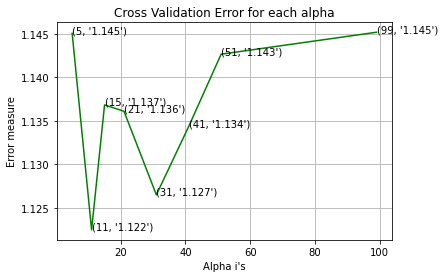

For values of best alpha =  11 The train log loss is: 0.6149161969979366
For values of best alpha =  11 The cross validation log loss is: 1.1224794278671169
For values of best alpha =  11 The test log loss is: 1.045231335262568


In [280]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.1224794278671169
Number of mis-classified points : 0.38345864661654133
-------------------- Confusion matrix --------------------


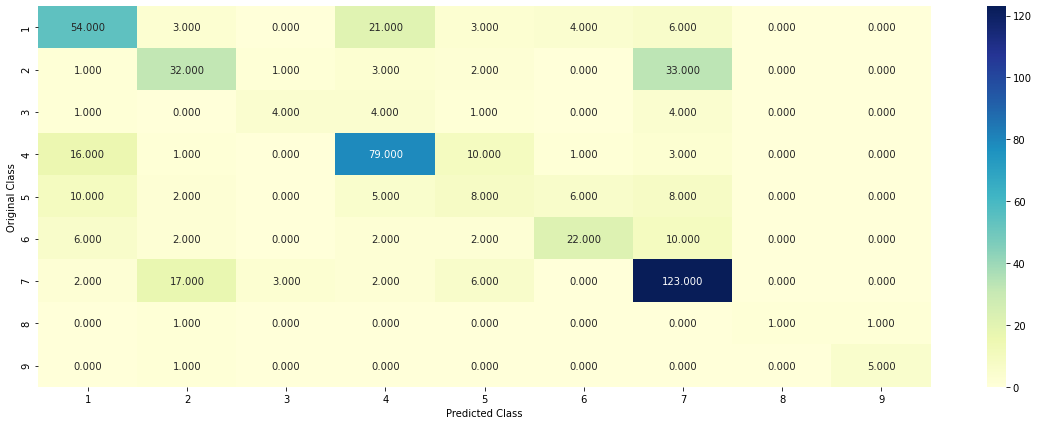

-------------------- Precision matrix (Columm Sum=1) --------------------


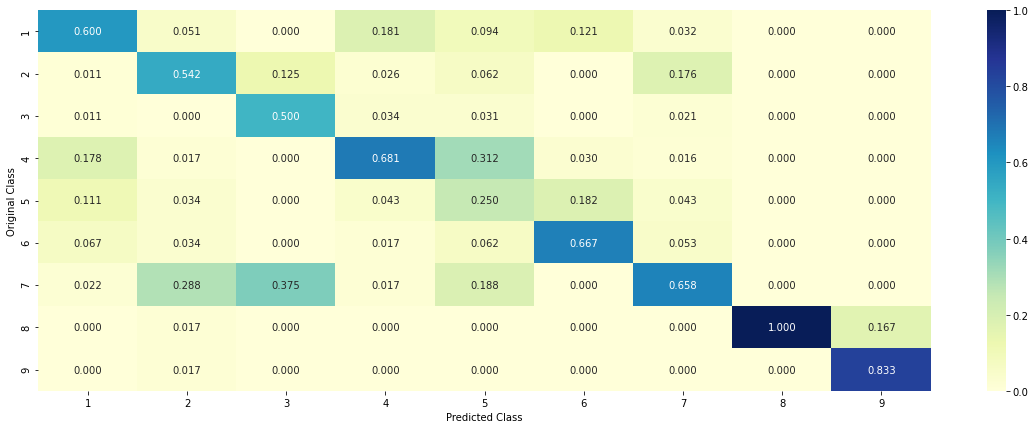

-------------------- Recall matrix (Row sum=1) --------------------


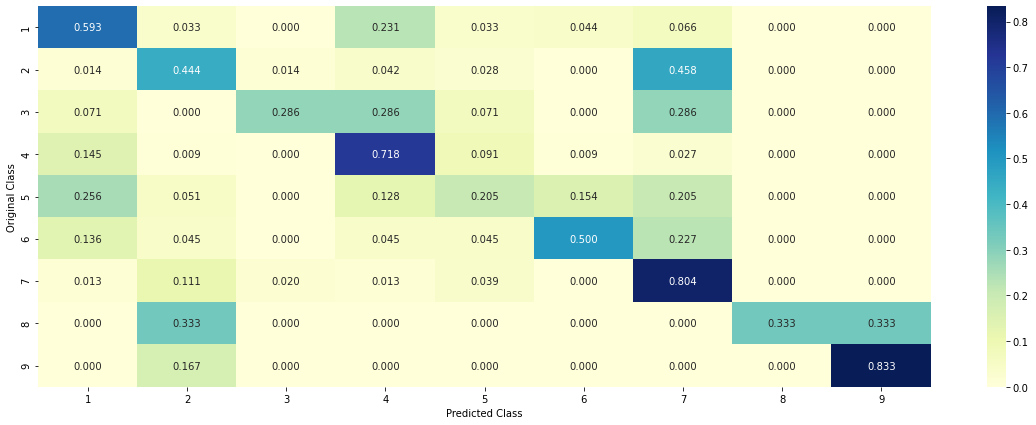

In [281]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [282]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 4
Actual Class : 5
The  11  nearest neighbours of the test points belongs to classes [1 5 1 4 1 1 1 4 4 6 5]
Fequency of nearest points : Counter({1: 5, 4: 3, 5: 2, 6: 1})


<h3>4.2.4. Sample Query Point-2 </h3>

In [283]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 1
Actual Class : 1
the k value for knn is 11 and the nearest neighbours of the test points belongs to classes [1 1 1 1 1 1 1 1 1 1 1]
Fequency of nearest points : Counter({1: 11})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.41313170678785
for alpha = 1e-05
Log Loss : 1.3757418595401005
for alpha = 0.0001
Log Loss : 1.2135589096690547
for alpha = 0.001
Log Loss : 1.1968250148505544
for alpha = 0.01
Log Loss : 1.2479078930379435
for alpha = 0.1
Log Loss : 1.51887084898051
for alpha = 1
Log Loss : 1.7030943905199263
for alpha = 10
Log Loss : 1.7237558110572446
for alpha = 100
Log Loss : 1.7258962140769445


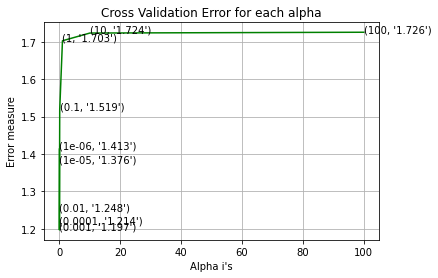

For values of best alpha =  0.001 The train log loss is: 0.5171229767001443
For values of best alpha =  0.001 The cross validation log loss is: 1.1968250148505544
For values of best alpha =  0.001 The test log loss is: 1.0300659618883534


In [284]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.1968250148505544
Number of mis-classified points : 0.37593984962406013
-------------------- Confusion matrix --------------------


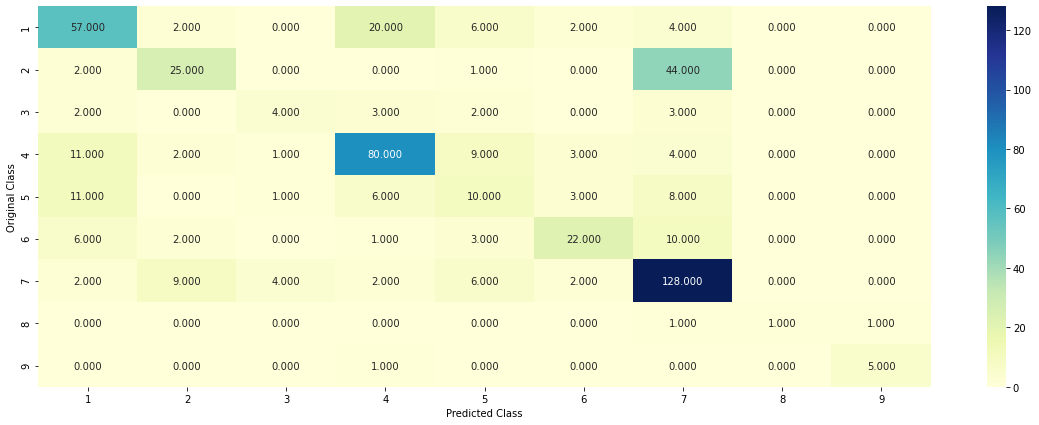

-------------------- Precision matrix (Columm Sum=1) --------------------


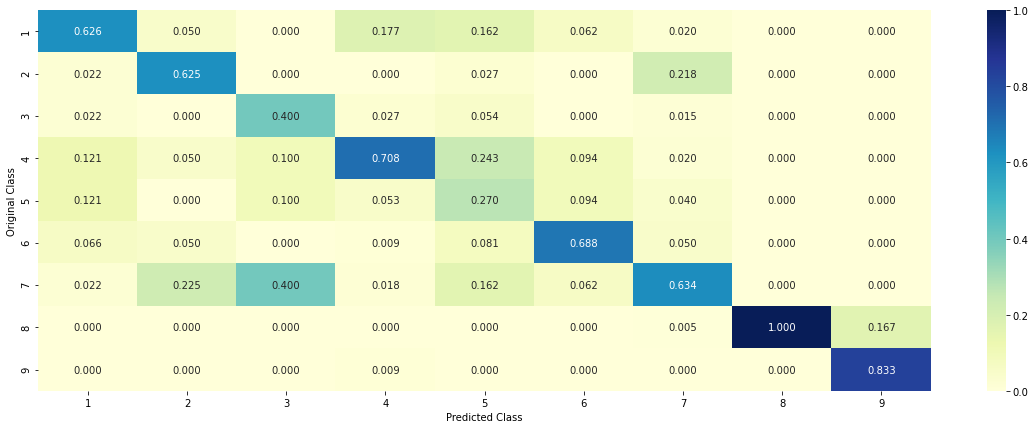

-------------------- Recall matrix (Row sum=1) --------------------


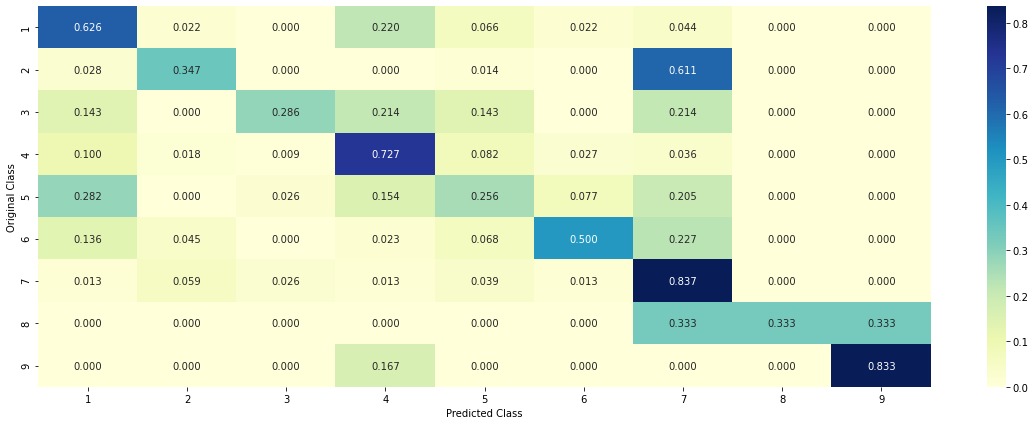

In [285]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [286]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [287]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.4246 0.0533 0.0111 0.2263 0.1855 0.0459 0.04   0.0062 0.007 ]]
Actual Class : 5
--------------------------------------------------
260 Text feature [kinase] present in test data point [True]
427 Text feature [mutants] present in test data point [True]
461 Text feature [dbd] present in test data point [True]
495 Text feature [nssnvs] present in test data point [True]
Out of the top  500  features  4 are present in query point


<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [288]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[9.817e-01 2.100e-03 0.000e+00 4.100e-03 7.000e-04 2.400e-03 4.000e-03
  4.900e-03 1.000e-04]]
Actual Class : 1
--------------------------------------------------
199 Text feature [ob1] present in test data point [True]
260 Text feature [kinase] present in test data point [True]
310 Text feature [193] present in test data point [True]
328 Text feature [chromatid] present in test data point [True]
368 Text feature [du145] present in test data point [True]
381 Text feature [3418] present in test data point [True]
383 Text feature [chemosensitivity] present in test data point [True]
393 Text feature [iha] present in test data point [True]
427 Text feature [mutants] present in test data point [True]
430 Text feature [agar] present in test data point [True]
436 Text feature [expressing] present in test data point [True]
445 Text feature [processing] present in test data point [True]
462 Text feature [premature] present in test data point [

<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.3576218687815407
for alpha = 1e-05
Log Loss : 1.3444998376022854
for alpha = 0.0001
Log Loss : 1.224856909555269
for alpha = 0.001
Log Loss : 1.2051566833877447
for alpha = 0.01
Log Loss : 1.2851949308526427
for alpha = 0.1
Log Loss : 1.4332062083366817
for alpha = 1
Log Loss : 1.6434854615328212


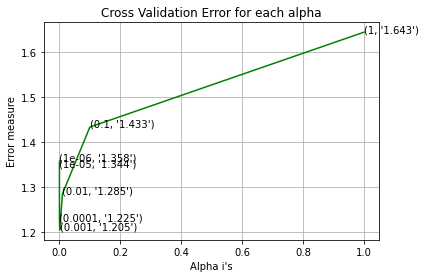

For values of best alpha =  0.001 The train log loss is: 0.5154164228468556
For values of best alpha =  0.001 The cross validation log loss is: 1.2051566833877447
For values of best alpha =  0.001 The test log loss is: 1.0440452515300103


In [289]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.2051566833877447
Number of mis-classified points : 0.37406015037593987
-------------------- Confusion matrix --------------------


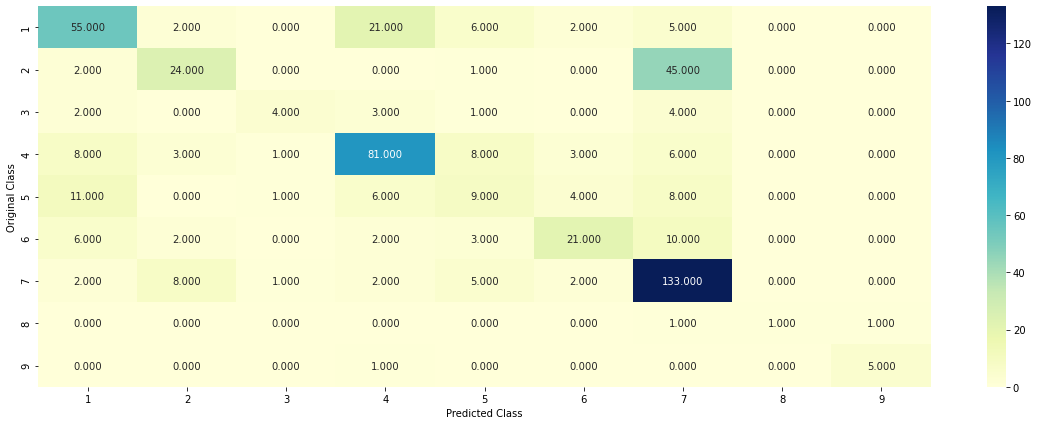

-------------------- Precision matrix (Columm Sum=1) --------------------


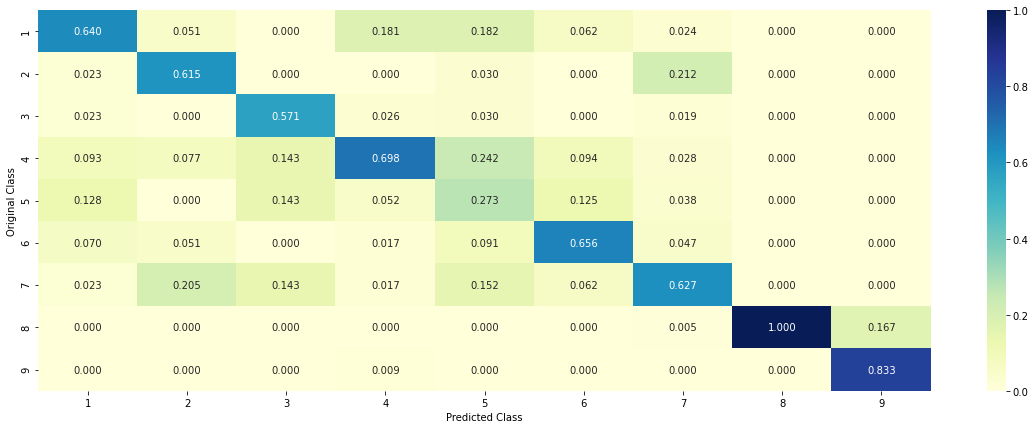

-------------------- Recall matrix (Row sum=1) --------------------


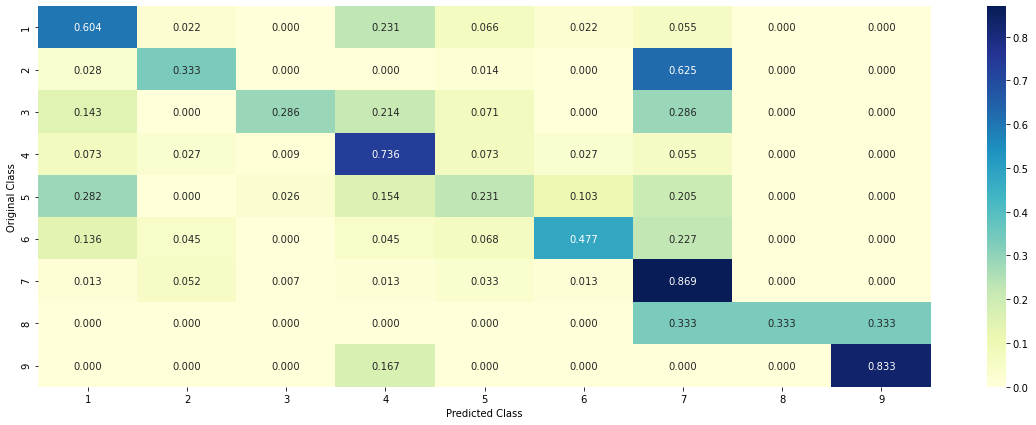

In [290]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [291]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.4188 0.0493 0.0115 0.263  0.1614 0.0428 0.042  0.0056 0.0054]]
Actual Class : 5
--------------------------------------------------
402 Text feature [kinase] present in test data point [True]
Out of the top  500  features  1 are present in query point


<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [292]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[9.808e-01 1.800e-03 0.000e+00 4.500e-03 5.000e-04 1.700e-03 6.600e-03
  4.100e-03 0.000e+00]]
Actual Class : 1
--------------------------------------------------
221 Text feature [ob1] present in test data point [True]
268 Text feature [193] present in test data point [True]
360 Text feature [du145] present in test data point [True]
370 Text feature [chromatid] present in test data point [True]
399 Text feature [iha] present in test data point [True]
401 Text feature [chemosensitivity] present in test data point [True]
402 Text feature [kinase] present in test data point [True]
411 Text feature [3418] present in test data point [True]
476 Text feature [processing] present in test data point [True]
Out of the top  500  features  9 are present in query point


<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.3730938341226082
for C = 0.0001
Log Loss : 1.279743981834742
for C = 0.001
Log Loss : 1.2313892707979373
for C = 0.01
Log Loss : 1.2289684389284694
for C = 0.1
Log Loss : 1.4181095137372115
for C = 1
Log Loss : 1.716487406717997
for C = 10
Log Loss : 1.7260658697257607
for C = 100
Log Loss : 1.726064291945375


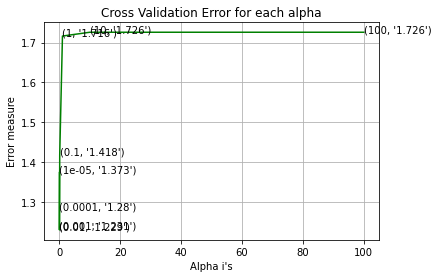

For values of best alpha =  0.01 The train log loss is: 0.7253820055274751
For values of best alpha =  0.01 The cross validation log loss is: 1.2289684389284694
For values of best alpha =  0.01 The test log loss is: 1.0931201512070985


In [293]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.2289684389284694
Number of mis-classified points : 0.38721804511278196
-------------------- Confusion matrix --------------------


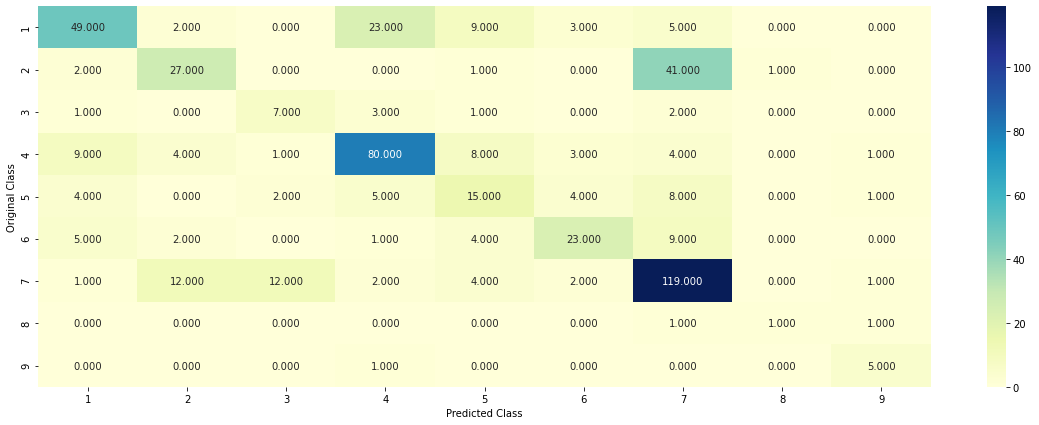

-------------------- Precision matrix (Columm Sum=1) --------------------


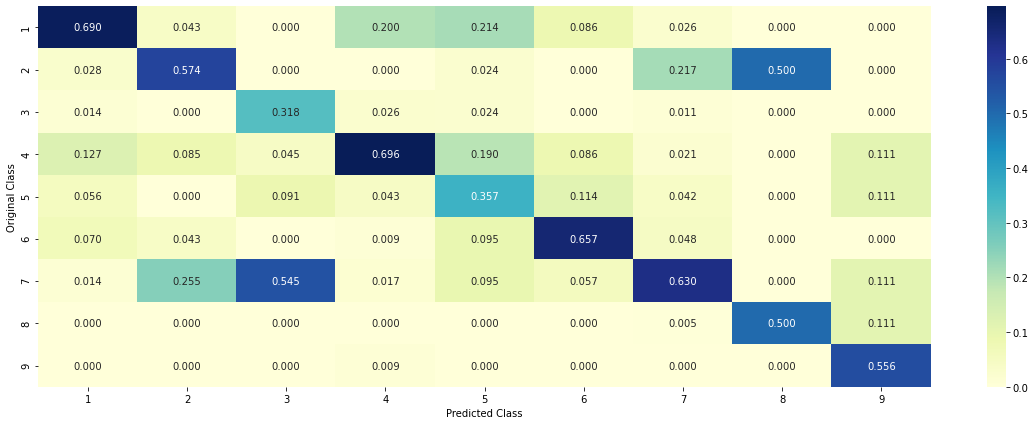

-------------------- Recall matrix (Row sum=1) --------------------


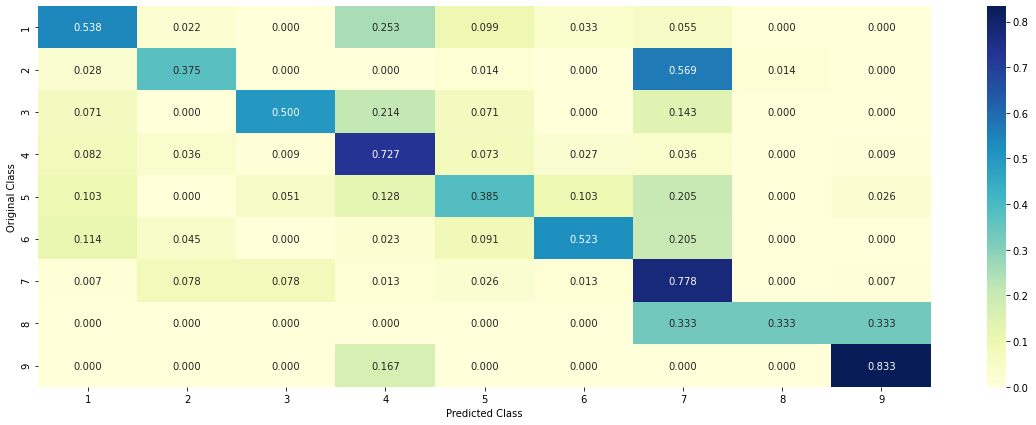

In [294]:
# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [295]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1903 0.1275 0.0252 0.2013 0.1787 0.0686 0.1886 0.0102 0.0095]]
Actual Class : 5
--------------------------------------------------
Out of the top  500  features  0 are present in query point


<h4>4.3.3.2. For Incorrectly classified point</h4>

In [296]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[8.466e-01 1.270e-02 7.000e-04 3.180e-02 6.400e-03 2.070e-02 7.800e-02
  3.000e-03 1.000e-04]]
Actual Class : 1
--------------------------------------------------
89 Text feature [chromatid] present in test data point [True]
105 Text feature [ob1] present in test data point [True]
130 Text feature [consist] present in test data point [True]
151 Text feature [premature] present in test data point [True]
159 Text feature [f11] present in test data point [True]
197 Text feature [decay] present in test data point [True]
209 Text feature [stop] present in test data point [True]
214 Text feature [rejoining] present in test data point [True]
248 Text feature [genotypic] present in test data point [True]
250 Text feature [homologs] present in test data point [True]
262 Text feature [processing] present in test data point [True]
263 Text feature [chemosensitivity] present in test data point [True]
274 Text feature [deficient] present in test d